<a href="https://colab.research.google.com/github/torchflash/MMAI831-Team-Project/blob/main/MMAI831_AI_in_Marketing_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from feature_engine.encoding import RareLabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [59]:
import os
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Set the directory to your specific folder in Google Drive
folder_path = "/content/drive/My Drive/Colab Notebooks/MMAI831 AI in Marketing/EMC Project/"

# Check if the directory exists and print the list of files and folders inside it
if os.path.exists(folder_path):
    files = os.listdir(folder_path)
    print(files)
else:
    print("Directory does not exist.")

root_dir = "/content/drive/My Drive/" 
# choose where you want your project files to be saved
project_folder = "Colab Notebooks/MMAI831 AI in Marketing/EMC Project/"
os.chdir(root_dir + project_folder)

Mounted at /content/drive
['Dataset.xlsx', 'Kaggle Codes', 'MMAI831_AI_in_Marketing_Project_OLD.ipynb', 'cleaned_data.csv', ' MMAI831_AI_in_Marketing_EMC_Model_Development.ipynb', 'MMAI831_AI_in_Marketing_EMC_SV_Model_Development.ipynb']


In [60]:
data = pd.read_csv('cleaned_data.csv')

Need to use the Click on columns as targets now. We can do it one by one or train based on all targets.

In [61]:
data.drop(data.columns[39:59], axis=1, inplace=True)

In [62]:
data.drop(data.columns[59:79], axis=1, inplace=True)

In [63]:
df=data.copy()

In [64]:
y=df.iloc[:, -20:]

In [65]:
df.drop(df.columns[39:59], axis=1, inplace=True)

In [66]:
drop_columns = ['Fave Sports', 'Most visited websites', 'Home country', 'Most listened musics', 'Most watched movies', 'Most watched tv programmes', 'Most read books']

In [67]:
df.drop(drop_columns, axis=1, inplace=True)

# Feature Engineering - Treating Categorical Features

We droped some columns for now, but will encode the 3 remaining features.

In [68]:
df_categorical_features = df.select_dtypes(include='object')
df_categorical_features.columns

Index(['Type of Job', 'Timepass'], dtype='object')

In [69]:
df['Type of Job'].value_counts()

Contract employment       39
Student                   37
Temporary                 18
Self-employment           14
Unemploied                 6
Housewife/Househusband     2
Odd job                    2
Consulting                 2
Name: Type of Job, dtype: int64

In [70]:
# df['Home country'].value_counts()

In [71]:
df['Timepass'].value_counts()

Internet    61
Reading     23
Sports      14
Music       11
Movie       11
Name: Timepass, dtype: int64

In [72]:
# data['Fave Sports'].value_counts()

In [73]:
# data['Most visited websites'].value_counts()

In [74]:
# rare_encoder = RareLabelEncoder(
#   tol=0.02,  # lower tolerance to capture more rare categories
#   n_categories=4,  # minimal number of categories to re-group rare categories
#   variables=['Home country'],  # variable to re-group
#   replace_with='Rare'  # value to replace rare categories with
# )
# df['Home country'] = rare_encoder.fit_transform(df[['Home country']])

In [75]:
rare_encoder = RareLabelEncoder(
  tol=0.02,  # lower tolerance to capture more rare categories
  n_categories=4,  # minimal number of categories to re-group rare categories
  variables=['Type of Job'],  # variable to re-group
  replace_with='Rare'  # value to replace rare categories with
)
df['Type of Job'] = rare_encoder.fit_transform(df[['Type of Job']])

In [76]:
# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['Type of Job'])

# df = pd.get_dummies(df, columns=['Home country'])

df = pd.get_dummies(df, columns=['Timepass'])

In [77]:
# # Standardize numerical features
# scaler = StandardScaler()
# numerical_cols = ['Age', 'Income', 'Openness to Experience', 'Conscientiousness', 'Extraversion',
#                   'Agreeableness', 'Neuroticism', 'Number of countries visited']
# df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Feature Selection

In [78]:
df.head()

,Gender,Age,Weekly working hours,Income,Openness to Experience,Conscientiousness,Extraversion,Agreeableness,Neuroticism,Number of countries visited,visits web in Automotive,visits web in Baby Products,visits web in Health & Beauty,visits web in Media,visits web in Consumer Electronics,visits web in Console & Video Games,visits web in Tools,visits web in Living,visits web in Grocery,visits web in Home,visits web in Betting,visits web in Jewellery & Watches,visits web in Musical Instruments,visits web in Office,visits web in Pet Supplies,visits web in Computer Software,visits web in Sports,visits web in Toys & Games,visits web in Dating,visits web in Clothing & Shoes,Type of Job_Contract employment,Type of Job_Rare,Type of Job_Self-employment,Type of Job_Student,Type of Job_Temporary,Type of Job_Unemploied,Timepass_Internet,Timepass_Movie,Timepass_Music,Timepass_Reading,Timepass_Sports
0,1,62,1,1,1,0,0,-1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,1,26,1,1,1,2,2,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
2,0,22,1,1,1,1,2,1,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,1,24,0,1,1,0,0,0,0,12,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
4,1,34,1,1,1,2,3,1,1,10,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1


In [79]:
print('We have', len(df.columns), 'features at the start')

We have 41 features at the start


# Model development

In [80]:
# pip install category_encoders

In [81]:
# pip install feature_engine

In [82]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [83]:
import sys
import numpy as np  
import pandas as pd  
import datetime as dt

# from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier

from prettytable import PrettyTable
# from sklearn.metrics import accuracy_score, log_loss, f1_score, precision_score, recall_score, plot_roc_curve
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score, mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold, cross_val_score, StratifiedKFold, cross_val_predict
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.utils import compute_class_weight
# from sklearn.metrics import plot_roc_curve
from sklearn import metrics

from feature_engine.encoding import RareLabelEncoder

from category_encoders import *
from category_encoders.wrapper import PolynomialWrapper
from category_encoders import OneHotEncoder, TargetEncoder, JamesSteinEncoder, CatBoostEncoder, MEstimateEncoder, WOEEncoder, LeaveOneOutEncoder

from google.colab import files

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tabulate import tabulate


In [86]:
# Drop al features excep OCEAN 
X_train_OCEAN = X_train.iloc[:, 5:10:]
X_test_OCEAN = X_test.iloc[:, 5:10:]

# Explanations

First, we fit a logistic regression model with lasso regularization (L1), and find the best features contributing to predicting each category. Then we run all models for the full 46 feature dataset and the selected features using regularization. Please note that each category gets a different set of important features, because essentially we are solving 12 classification problems together. 

# Define the tree based models

In [87]:
rf_clf = RandomForestClassifier(
          n_estimators = 10,
          criterion = 'entropy', 
          max_depth = None, # 
          min_samples_split=2,
          min_samples_leaf=1, 
          max_features= 'sqrt', #{“sqrt”, “log2”, None}, int or float, default=”sqrt”
          max_leaf_nodes = None, #Grow trees with max_leaf_nodes in best-first fashion. 
          #Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
          min_impurity_decrease = 0, #A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
          bootstrap = True,
          warm_start = False, #When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest
          class_weight = 'balanced',
          max_samples = None,
          verbose = 0,
          n_jobs = -1,
          random_state = 17,
)

In [88]:
# importing the lightgbm module
import lightgbm as lgb
# initializing the model
LightGBM_Clf = lgb.LGBMClassifier(
    boosting_type='gbdt',
    num_leaves = 5,
    max_depth=-1,
    learning_rate = 0.02,
    n_estimators=10,
    subsample_for_bin=200000,
    objective=None,
    class_weight= None, 
    min_split_gain=0.0, 
    min_child_weight=0.001, 
    min_child_samples=20, 
    subsample=1.0, 
    subsample_freq=0, 
    colsample_bytree=1.0, 
    reg_alpha=0.0, 
    reg_lambda=0.0, 
    random_state=17, 
    n_jobs=-1, 
    silent=True, 
    importance_type='split',
    verbosity = 0,
    
)

In [89]:
xgboost_clf = XGBClassifier(max_depth = 10, # the larger the more prone to overfit, range 3-10
                learning_rate = .4, # range [0,1], typically=0.01-0.2
                n_estimators = 10,
                verbosity = 1,
                objective = "binary:logistic",
                booster = "gbtree", # gblinear or dart
                n_jobs = -1,
                gamma = 0, 
                # Minimum loss reduction required to split. range=[0,inf],
                # The larger gamma is, the more conservative the algorithm will be.
                min_child_weight = 1, # used to restrict overfitting
                max_delta_step = 0,
                subsample = 0.8,
                colsample_bytree = 0.2,
                # colsample_bylevel = 0.5,
                # colsample_bynode = 0.5,
                reg_alpha = 0,
                reg_lambda = 1,
                scale_pos_weight = 0.5, #[default=1]
                random_state = 17,
                            
)

In [90]:
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression(
    # penalty='l2',  # Regularization type (default is L2)
    C = 0.3,  # Inverse of regularization strength (default is 1.0)
    solver='liblinear',  # Optimization algorithm (default is 'lbfgs')  #For small datasets, 'liblinear' is a good choice, whereas 'sag' and 'saga' are faster for large ones
    max_iter=1000,   # Maximum number of iterations (default is 100)
    multi_class='auto', 
    random_state=17  # Random state for reproducibility (default is None)
)

# Fit the Models

## Logistic Regression

In [91]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Create a dictionary to store the important features and their counts for each target column
feature_importance = {}
column_names = y.columns
# Loop through each target column
for i, target_column_name in enumerate(column_names):
    # Train LogisticRegression model with L1 regularization for the current target column
    logistic_reg_l1 = LogisticRegression(penalty='l1',C=0.3, solver='liblinear', multi_class='auto', max_iter=1000, random_state=17)
    logistic_reg_l1.fit(X_train, y_train.iloc[:, i])
    
    # Get the coefficients from the logistic regression model
    coef = logistic_reg_l1.coef_
    
    # Identify the most important features based on non-zero coefficient values
    important_features = X_train.columns[np.abs(coef[0]) > 0]
    
    # Store the important features and their counts for the target column
    feature_importance[target_column_name] = {
        'features': important_features,
        'count': len(important_features)
    }

# Print the important features and their counts for each target column
for target_column_name, importance_info in feature_importance.items():
    print(f"Target column '{target_column_name}':")
    print("Important Features:", importance_info['features'])
    print("Number of Features:", importance_info['count'])
    print('\n')


Target column 'clicks Automotive':
Important Features: Index(['Income', 'Openness to Experience', 'Conscientiousness', 'Extraversion',
       'Agreeableness', 'Neuroticism', 'Number of countries visited',
       'visits web in Health & Beauty'],
      dtype='object')
Number of Features: 8


Target column 'clicks Baby Products':
Important Features: Index(['Age', 'Extraversion', 'Neuroticism', 'Number of countries visited',
       'visits web in Tools'],
      dtype='object')
Number of Features: 5


Target column 'clicks Health & Beauty':
Important Features: Index(['Agreeableness', 'Number of countries visited', 'visits web in Media',
       'Type of Job_Contract employment', 'Type of Job_Student'],
      dtype='object')
Number of Features: 5


Target column 'clicks Media':
Important Features: Index(['Gender', 'Age', 'Income', 'Openness to Experience',
       'Conscientiousness', 'Extraversion', 'Neuroticism',
       'Number of countries visited', 'visits web in Health & Beauty',
       

Target column 'clicks Automotive':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    0        | 0        |   0        |  4        |
| 1            |    0.826087 | 0.95     |   0.883721 | 20        |
| accuracy     |    0.791667 | 0.791667 |   0.791667 |  0.791667 |
| macro avg    |    0.413043 | 0.475    |   0.44186  | 24        |
| weighted avg |    0.688406 | 0.791667 |   0.736434 | 24        |
+--------------+-------------+----------+------------+-----------+


Target column 'clicks Baby Products':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    0.4      | 0.545455 |   0.461538 | 11        |
| 1            |    0.444444 | 0.307692 |   0.363636 |

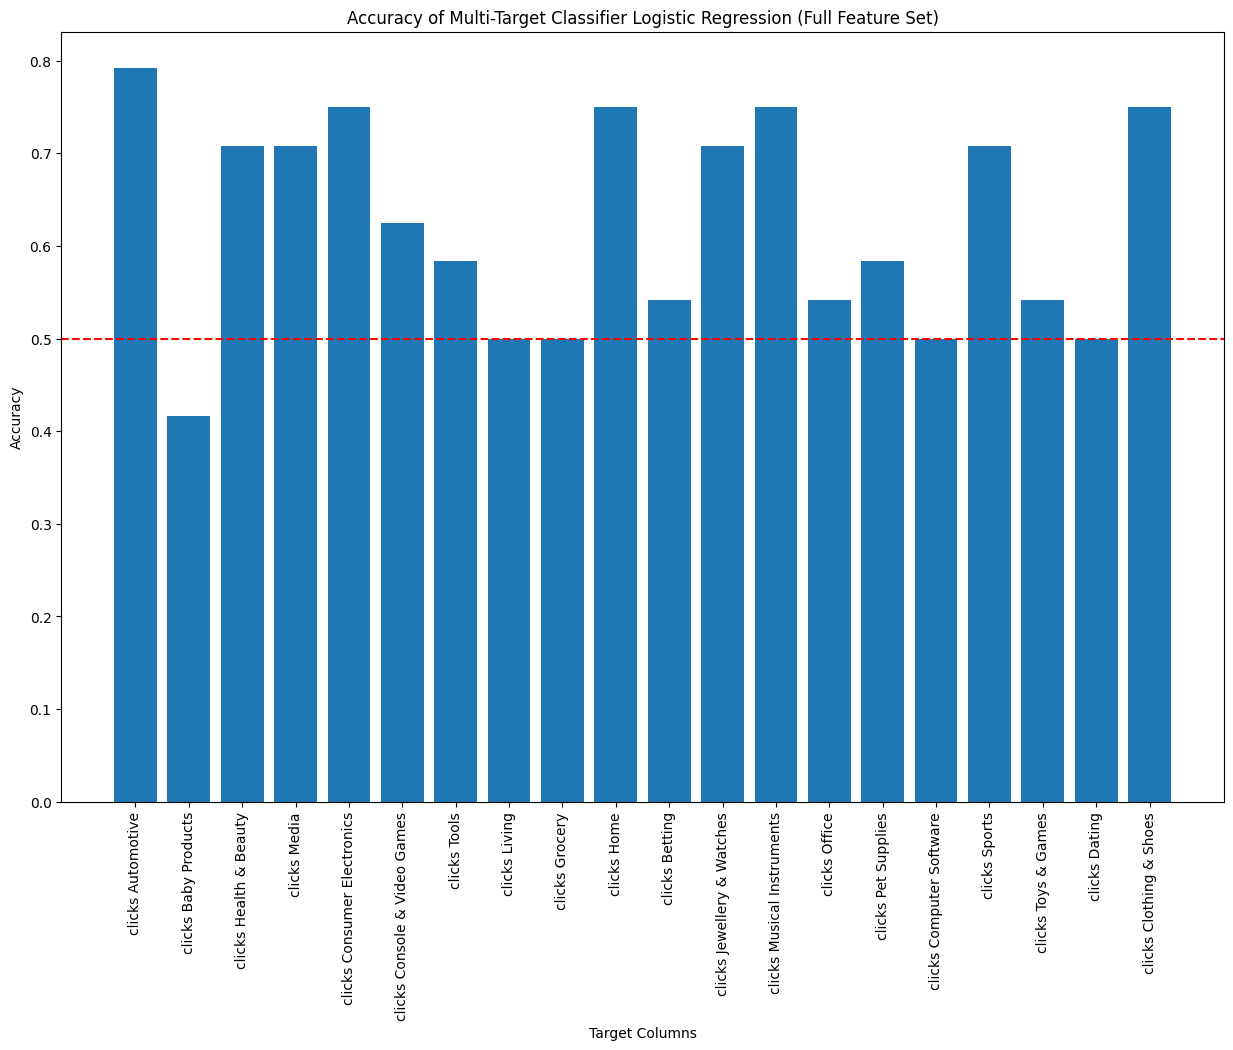

In [92]:
# Train with full data
multi_target_classifier = MultiOutputClassifier(logistic_reg_l1)
multi_target_classifier.fit(X_train, y_train)

y_pred = multi_target_classifier.predict(X_test)

column_names = y.columns

# Create a dictionary to store the classification report for each target column
classification_reports = {}

# Calculate the classification report for each target column
for i in range(y_test.shape[1]):
    target_column_name = column_names[i]
    classification_reports[target_column_name] = classification_report(y_test.iloc[:, i], y_pred[:, i], output_dict=True, zero_division=1)

# Convert the classification reports to tables and print them
for target_column_name, report in classification_reports.items():
    print(f"Target column '{target_column_name}':")
    report_table = pd.DataFrame(report).transpose()
    print(tabulate(report_table, headers='keys', tablefmt='psql'))
    print('\n')

# Store the accuracy scores for each target column
Reg_LGR_accuracies = []

# Extract the accuracy score for each target column
for target_column_name, report in classification_reports.items():
    accuracy = report['accuracy']
    Reg_LGR_accuracies.append(accuracy)

# Plot the accuracies
plt.figure(figsize=(15, 10))
plt.axhline(y=0.5, color='r', linestyle='--')
plt.bar(column_names, Reg_LGR_accuracies)
plt.xlabel('Target Columns')
plt.ylabel('Accuracy')
plt.title('Accuracy of Multi-Target Classifier Logistic Regression (Full Feature Set)')
plt.xticks(rotation=90)
plt.show()

Target column 'clicks Automotive':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    0.333333 | 0.25     |   0.285714 |  4        |
| 1            |    0.857143 | 0.9      |   0.878049 | 20        |
| accuracy     |    0.791667 | 0.791667 |   0.791667 |  0.791667 |
| macro avg    |    0.595238 | 0.575    |   0.581882 | 24        |
| weighted avg |    0.769841 | 0.791667 |   0.779326 | 24        |
+--------------+-------------+----------+------------+-----------+


Target column 'clicks Baby Products':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    0.428571 | 0.545455 |   0.48     | 11        |
| 1            |    0.5      | 0.384615 |   0.434783 |

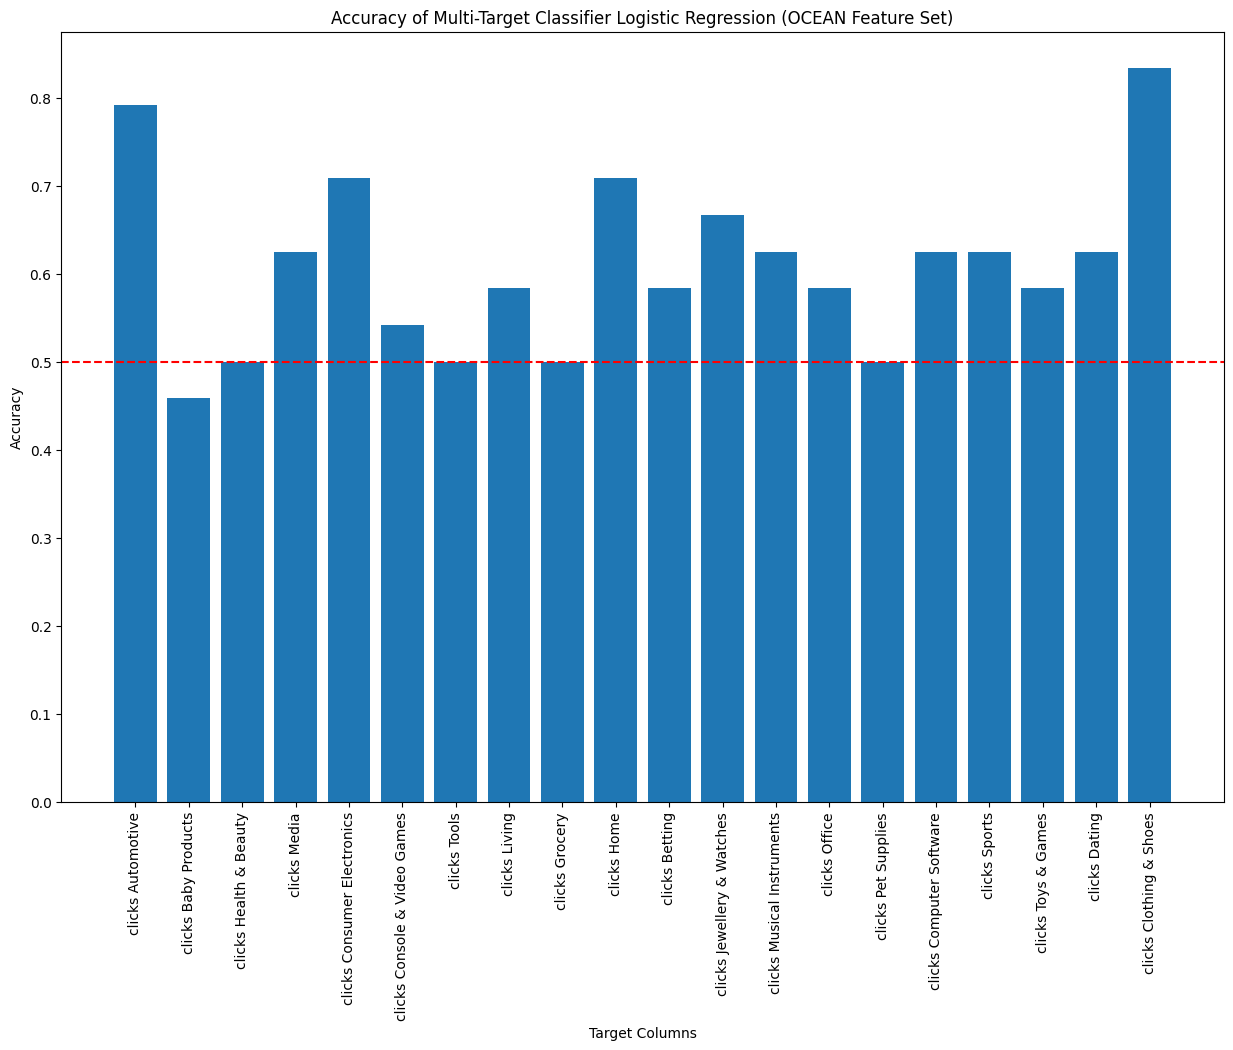

In [93]:

multi_target_classifier = MultiOutputClassifier(logistic_reg)
multi_target_classifier.fit(X_train, y_train)

y_pred = multi_target_classifier.predict(X_test)

column_names = y.columns

# Create a dictionary to store the classification report for each target column
classification_reports = {}

# Calculate the classification report for each target column
for i in range(y_test.shape[1]):
    target_column_name = column_names[i]
    classification_reports[target_column_name] = classification_report(y_test.iloc[:, i], y_pred[:, i], output_dict=True, zero_division=1)

# Convert the classification reports to tables and print them
for target_column_name, report in classification_reports.items():
    print(f"Target column '{target_column_name}':")
    report_table = pd.DataFrame(report).transpose()
    print(tabulate(report_table, headers='keys', tablefmt='psql'))
    print('\n')

# Store the accuracy scores for each target column
Full_LGR_accuracies = []

# Extract the accuracy score for each target column
for target_column_name, report in classification_reports.items():
    accuracy = report['accuracy']
    Full_LGR_accuracies.append(accuracy)

# Plot the accuracies
plt.figure(figsize=(15, 10))
plt.axhline(y=0.5, color='r', linestyle='--')
plt.bar(column_names, Full_LGR_accuracies)
plt.xlabel('Target Columns')
plt.ylabel('Accuracy')
plt.title('Accuracy of Multi-Target Classifier Logistic Regression (OCEAN Feature Set)')
plt.xticks(rotation=90)
plt.show()

## Naive_Bayes

Target column 'clicks Automotive':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    0.333333 | 0.25     |   0.285714 |  4        |
| 1            |    0.857143 | 0.9      |   0.878049 | 20        |
| accuracy     |    0.791667 | 0.791667 |   0.791667 |  0.791667 |
| macro avg    |    0.595238 | 0.575    |   0.581882 | 24        |
| weighted avg |    0.769841 | 0.791667 |   0.779326 | 24        |
+--------------+-------------+----------+------------+-----------+


Target column 'clicks Baby Products':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    0.428571 | 0.545455 |   0.48     | 11        |
| 1            |    0.5      | 0.384615 |   0.434783 |

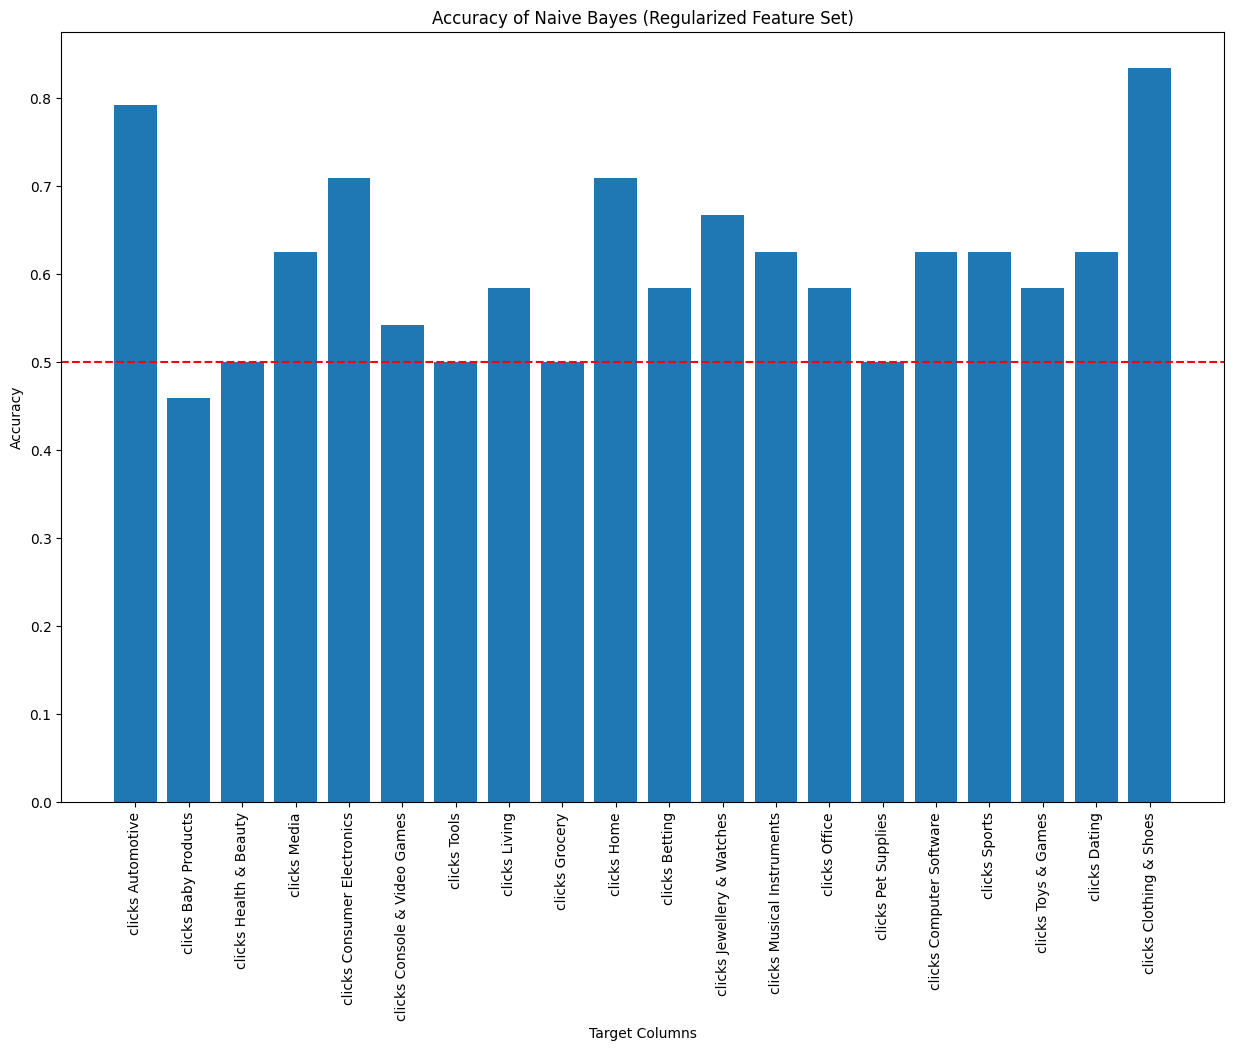

In [94]:
from sklearn.naive_bayes import GaussianNB

# Define and train the Naive Bayes model
naive_bayes = GaussianNB()

# Create a dictionary to store the classification report for each target column
classification_reports = {}

# Train and predict for each target column
for target_column_name, importance_info in feature_importance.items():
    features = importance_info['features']
    X_train_subset = X_train[features]
    X_test_subset = X_test[features]
    
    # Extract the single target column for the current category
    y_train_subset = y_train[target_column_name]
    
    # Create a new instance of the Naive bayes model for each target column
    naive_bayes = GaussianNB()
    # svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=17)
    
    # Train the Naive bayes model
    naive_bayes.fit(X_train_subset, y_train_subset)
    
    # Predict on the test set
    y_pred_subset = naive_bayes.predict(X_test_subset)
    
    # Store the classification report
    classification_reports[target_column_name] = classification_report(
        y_test[target_column_name], y_pred_subset, output_dict=True, zero_division=1
    )
# Create a dictionary to store the classification report for each target column
classification_reports = {}

# Calculate the classification report for each target column
for i in range(y_test.shape[1]):
    target_column_name = column_names[i]
    classification_reports[target_column_name] = classification_report(y_test.iloc[:, i], y_pred[:, i], output_dict=True, zero_division=1)

# Convert the classification reports to tables and print them
for target_column_name, report in classification_reports.items():
    print(f"Target column '{target_column_name}':")
    report_table = pd.DataFrame(report).transpose()
    print(tabulate(report_table, headers='keys', tablefmt='psql'))
    print('\n')

# Store the accuracy scores for each target column
Reg_NB_accuracies = []

# Extract the accuracy score for each target column
for target_column_name, report in classification_reports.items():
    accuracy = report['accuracy']
    Reg_NB_accuracies.append(accuracy)

# Plot the accuracies
plt.figure(figsize=(15, 10))
plt.axhline(y=0.5, color='r', linestyle='--')
plt.bar(column_names, Reg_NB_accuracies)
plt.xlabel('Target Columns')
plt.ylabel('Accuracy')
plt.title('Accuracy of Naive Bayes (Regularized Feature Set)')
plt.xticks(rotation=90)
plt.show()


Target column 'clicks Automotive':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    0.176471 |    0.75  |   0.285714 |     4     |
| 1            |    0.857143 |    0.3   |   0.444444 |    20     |
| accuracy     |    0.375    |    0.375 |   0.375    |     0.375 |
| macro avg    |    0.516807 |    0.525 |   0.365079 |    24     |
| weighted avg |    0.743697 |    0.375 |   0.417989 |    24     |
+--------------+-------------+----------+------------+-----------+


Target column 'clicks Baby Products':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    0.526316 | 0.909091 |   0.666667 | 11        |
| 1            |    0.8      | 0.307692 |   0.444444 |

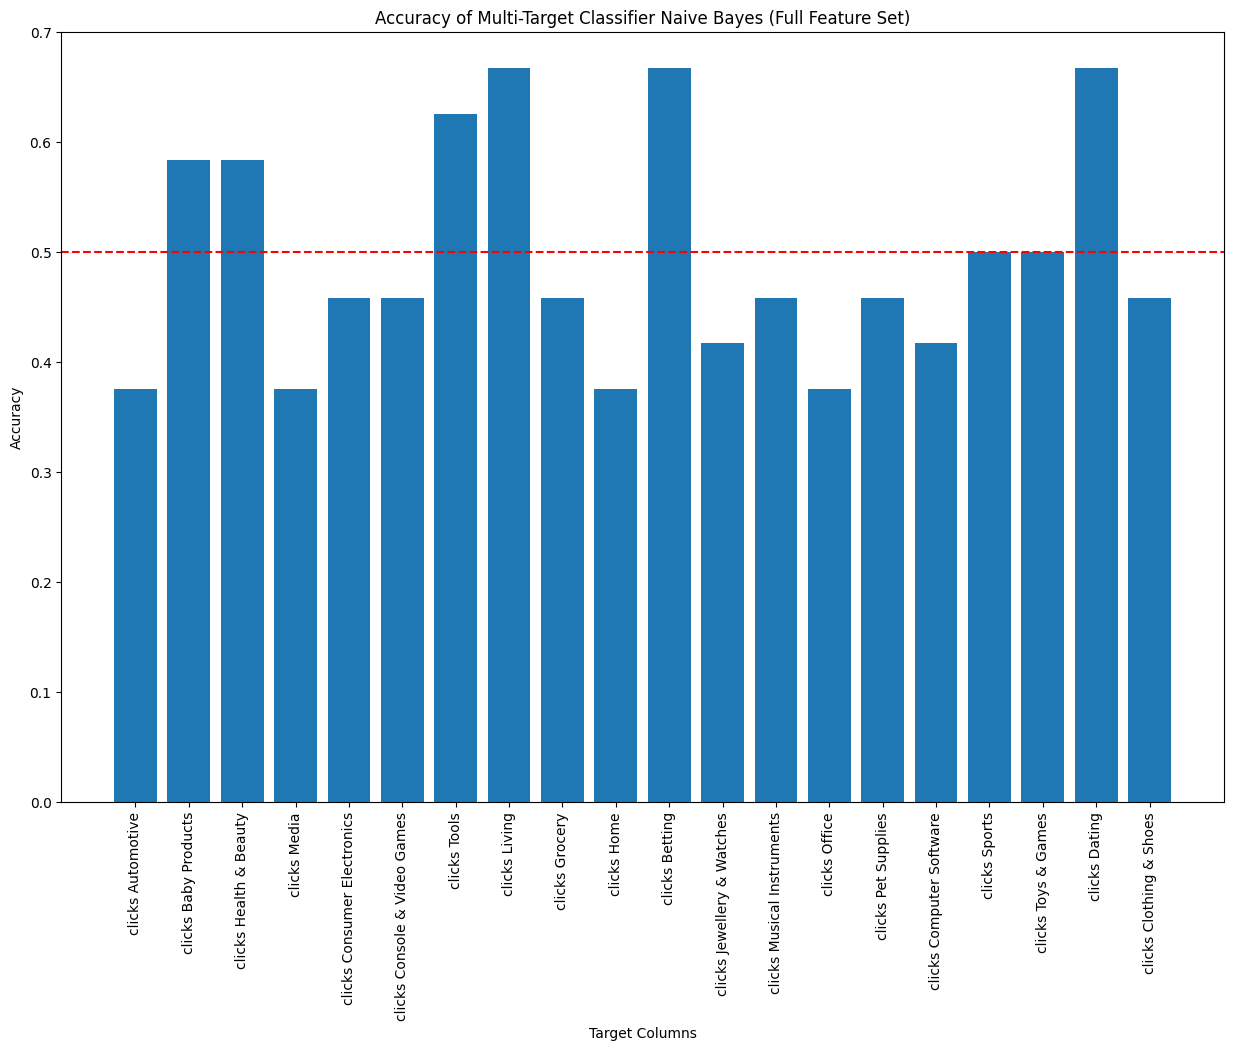

In [95]:
from sklearn.naive_bayes import GaussianNB

# Define and train the Naive Bayes model
naive_bayes = GaussianNB()

# Train with full data
multi_target_classifier = MultiOutputClassifier(naive_bayes)
multi_target_classifier.fit(X_train, y_train)

y_pred = multi_target_classifier.predict(X_test)

column_names = y.columns

# Create a dictionary to store the classification report for each target column
classification_reports = {}

# Calculate the classification report for each target column
for i in range(y_test.shape[1]):
    target_column_name = column_names[i]
    classification_reports[target_column_name] = classification_report(y_test.iloc[:, i], y_pred[:, i], output_dict=True, zero_division=1)

# Convert the classification reports to tables and print them
for target_column_name, report in classification_reports.items():
    print(f"Target column '{target_column_name}':")
    report_table = pd.DataFrame(report).transpose()
    print(tabulate(report_table, headers='keys', tablefmt='psql'))
    print('\n')

# Store the accuracy scores for each target column
Full_NB_accuracies = []

# Extract the accuracy score for each target column
for target_column_name, report in classification_reports.items():
    accuracy = report['accuracy']
    Full_NB_accuracies.append(accuracy)

# Plot the accuracies
plt.figure(figsize=(15, 10))
plt.axhline(y=0.5, color='r', linestyle='--')
plt.bar(column_names, Full_NB_accuracies)
plt.xlabel('Target Columns')
plt.ylabel('Accuracy')
plt.title('Accuracy of Multi-Target Classifier Naive Bayes (Full Feature Set)')
plt.xticks(rotation=90)
plt.show()


## SVM

In [96]:
type(feature_importance)

dict

Target column 'clicks Automotive':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    0.176471 |    0.75  |   0.285714 |     4     |
| 1            |    0.857143 |    0.3   |   0.444444 |    20     |
| accuracy     |    0.375    |    0.375 |   0.375    |     0.375 |
| macro avg    |    0.516807 |    0.525 |   0.365079 |    24     |
| weighted avg |    0.743697 |    0.375 |   0.417989 |    24     |
+--------------+-------------+----------+------------+-----------+


Target column 'clicks Baby Products':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    0.526316 | 0.909091 |   0.666667 | 11        |
| 1            |    0.8      | 0.307692 |   0.444444 |

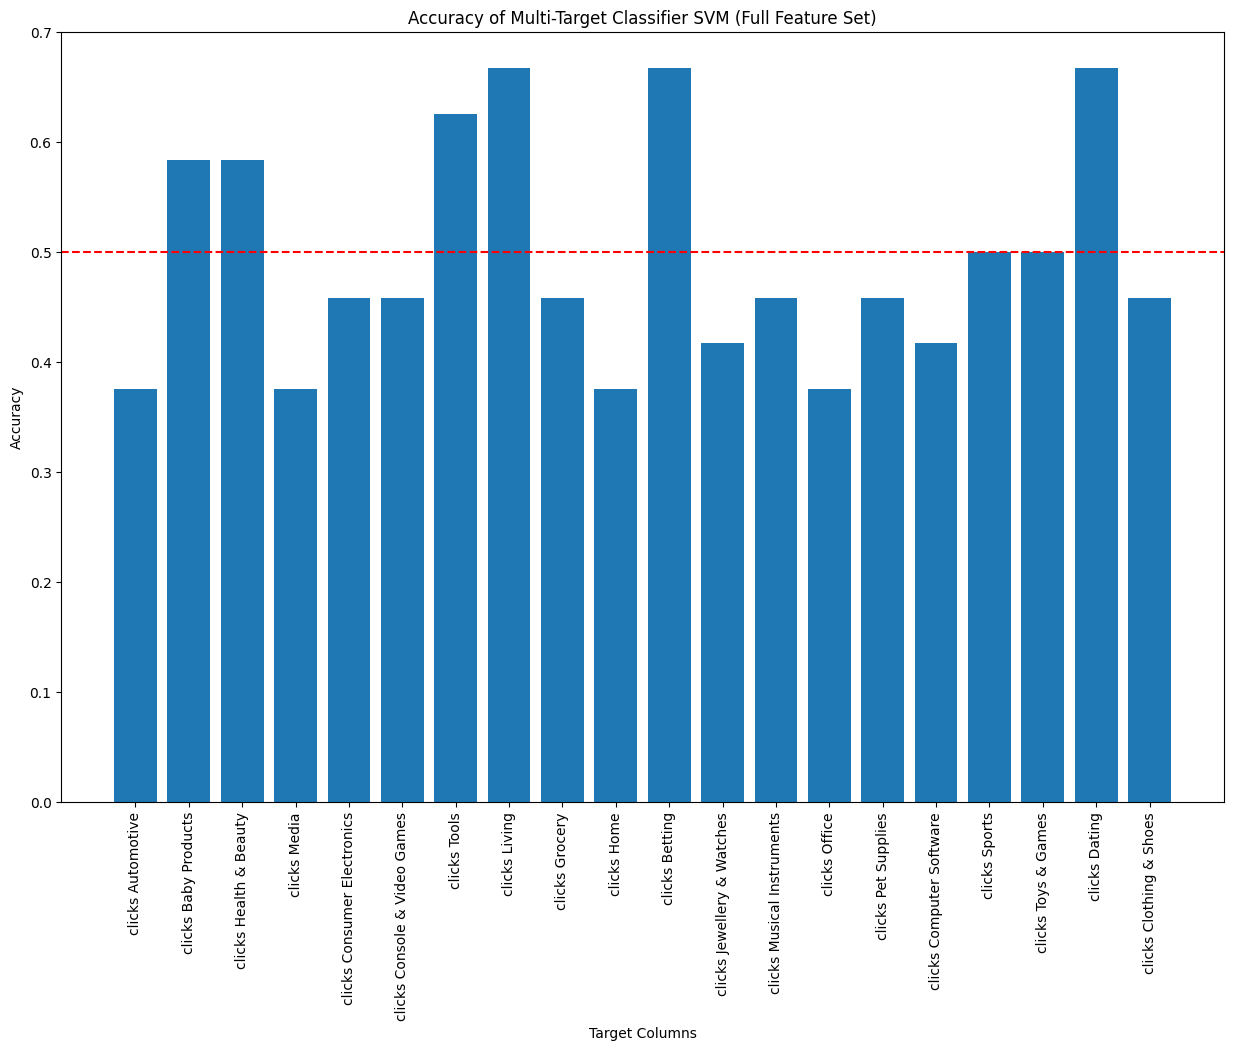

In [97]:
from sklearn.svm import SVC

# Create a dictionary to store the classification report for each target column
classification_reports = {}

# Train and predict for each target column
for target_column_name, importance_info in feature_importance.items():
    features = importance_info['features']
    X_train_subset = X_train[features]
    X_test_subset = X_test[features]
    
    # Extract the single target column for the current category
    y_train_subset = y_train[target_column_name]
    
    # Create a new instance of the SVM model for each target column
    svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=17)
    
    # Train the SVM model
    svm.fit(X_train_subset, y_train_subset)
    
    # Predict on the test set
    y_pred_subset = svm.predict(X_test_subset)
    
    # Store the classification report
    classification_reports[target_column_name] = classification_report(
        y_test[target_column_name], y_pred_subset, output_dict=True, zero_division=1
    )
# Create a dictionary to store the classification report for each target column
classification_reports = {}

# Calculate the classification report for each target column
for i in range(y_test.shape[1]):
    target_column_name = column_names[i]
    classification_reports[target_column_name] = classification_report(y_test.iloc[:, i], y_pred[:, i], output_dict=True, zero_division=1)

# Convert the classification reports to tables and print them
for target_column_name, report in classification_reports.items():
    print(f"Target column '{target_column_name}':")
    report_table = pd.DataFrame(report).transpose()
    print(tabulate(report_table, headers='keys', tablefmt='psql'))
    print('\n')

# Store the accuracy scores for each target column
Reg_SVM_accuracies = []

# Extract the accuracy score for each target column
for target_column_name, report in classification_reports.items():
    accuracy = report['accuracy']
    Reg_SVM_accuracies.append(accuracy)

# Plot the accuracies
plt.figure(figsize=(15, 10))
plt.axhline(y=0.5, color='r', linestyle='--')
plt.bar(column_names, Reg_SVM_accuracies)
plt.xlabel('Target Columns')
plt.ylabel('Accuracy')
plt.title('Accuracy of Multi-Target Classifier SVM (Full Feature Set)')
plt.xticks(rotation=90)
plt.show()


Target column 'clicks Automotive':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    1        | 0        |   0        |  4        |
| 1            |    0.833333 | 1        |   0.909091 | 20        |
| accuracy     |    0.833333 | 0.833333 |   0.833333 |  0.833333 |
| macro avg    |    0.916667 | 0.5      |   0.454545 | 24        |
| weighted avg |    0.861111 | 0.833333 |   0.757576 | 24        |
+--------------+-------------+----------+------------+-----------+


Target column 'clicks Baby Products':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    0.458333 | 1        |   0.628571 | 11        |
| 1            |    1        | 0        |   0        |

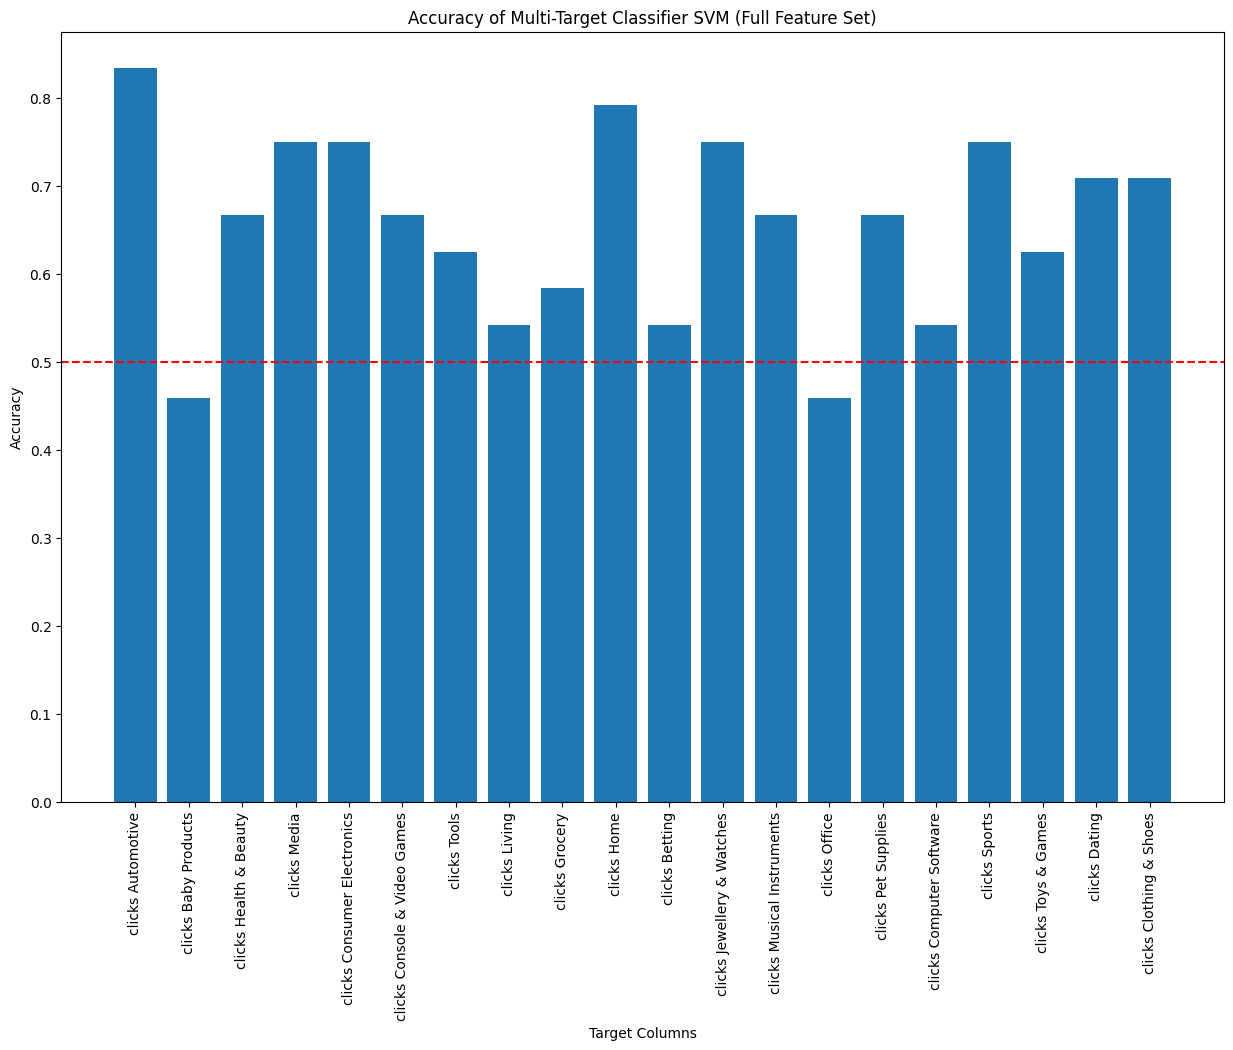

In [98]:
from sklearn.svm import SVC

# Define and train the SVM model
svm = SVC(
    kernel='rbf',  # Kernel type, e.g., 'linear', 'rbf', 'poly'
    C=1.0,  # Regularization parameter (default is 1.0)
    gamma='scale',  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    random_state=17
)

# Train with full data
multi_target_classifier = MultiOutputClassifier(svm)
multi_target_classifier.fit(X_train, y_train)

y_pred = multi_target_classifier.predict(X_test)

column_names = y.columns

# Create a dictionary to store the classification report for each target column
classification_reports = {}

# Calculate the classification report for each target column
for i in range(y_test.shape[1]):
    target_column_name = column_names[i]
    classification_reports[target_column_name] = classification_report(y_test.iloc[:, i], y_pred[:, i], output_dict=True, zero_division=1)

# Convert the classification reports to tables and print them
for target_column_name, report in classification_reports.items():
    print(f"Target column '{target_column_name}':")
    report_table = pd.DataFrame(report).transpose()
    print(tabulate(report_table, headers='keys', tablefmt='psql'))
    print('\n')

# Store the accuracy scores for each target column
Full_SVM_accuracies = []

# Extract the accuracy score for each target column
for target_column_name, report in classification_reports.items():
    accuracy = report['accuracy']
    Full_SVM_accuracies.append(accuracy)

# Plot the accuracies
plt.figure(figsize=(15, 10))
plt.axhline(y=0.5, color='r', linestyle='--')
plt.bar(column_names, Full_SVM_accuracies)
plt.xlabel('Target Columns')
plt.ylabel('Accuracy')
plt.title('Accuracy of Multi-Target Classifier SVM (Full Feature Set)')
plt.xticks(rotation=90)
plt.show()


## Random Forest

Target column 'clicks Automotive':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    0.285714 | 0.5      |   0.363636 |  4        |
| 1            |    0.882353 | 0.75     |   0.810811 | 20        |
| accuracy     |    0.708333 | 0.708333 |   0.708333 |  0.708333 |
| macro avg    |    0.584034 | 0.625    |   0.587224 | 24        |
| weighted avg |    0.782913 | 0.708333 |   0.736282 | 24        |
+--------------+-------------+----------+------------+-----------+


Target column 'clicks Baby Products':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    0.5      | 0.727273 |   0.592593 | 11        |
| 1            |    0.625    | 0.384615 |   0.47619  |

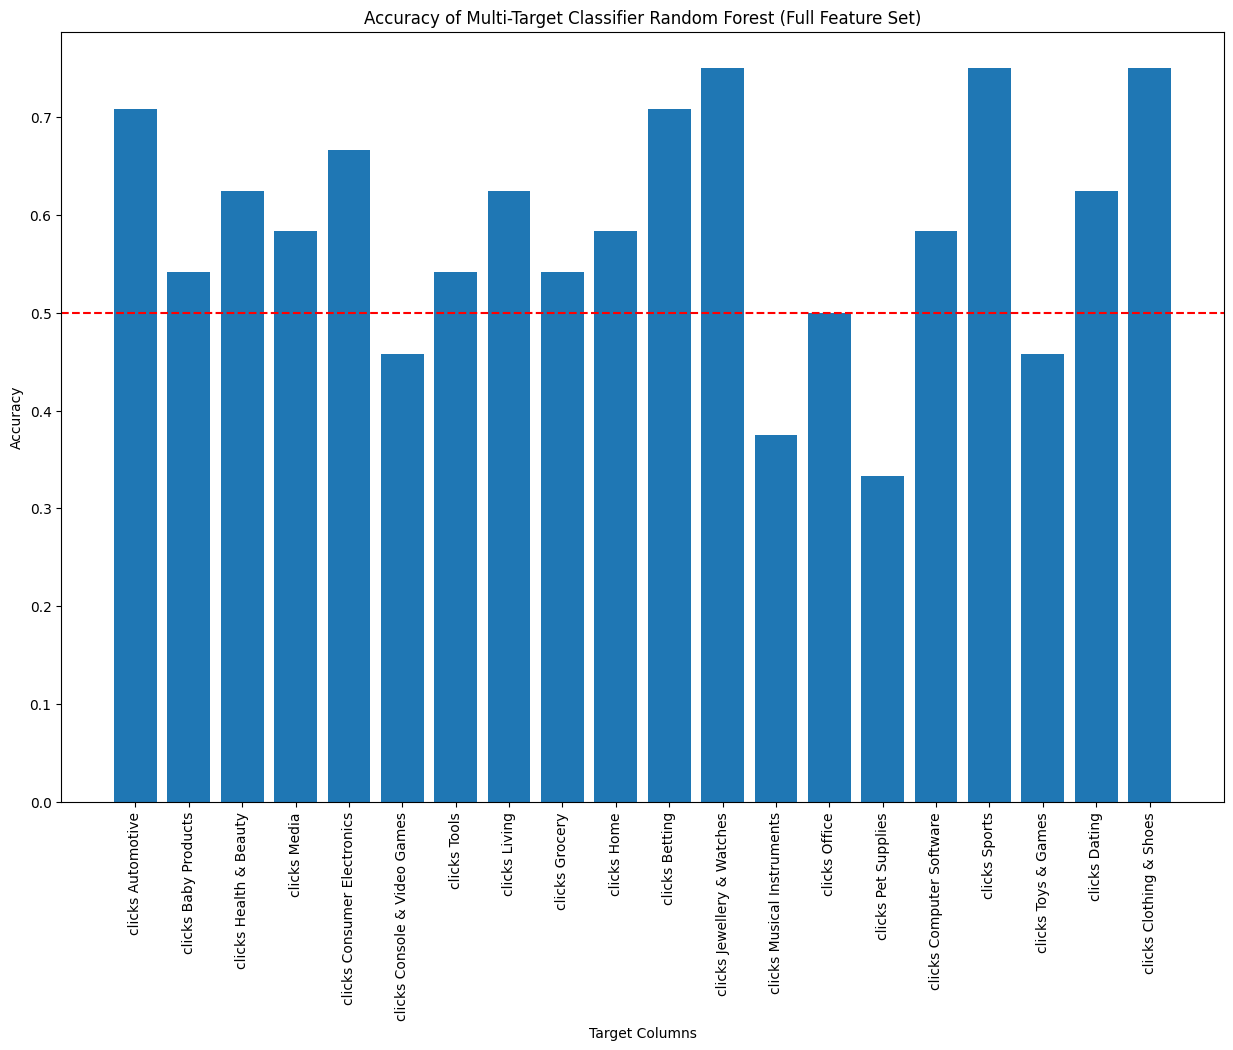

In [99]:
# Train with Full data
multi_target_classifier = MultiOutputClassifier(rf_clf)
multi_target_classifier.fit(X_train, y_train)

y_pred = multi_target_classifier.predict(X_test)

column_names = y.columns

# Create a dictionary to store the classification report for each target column
classification_reports = {}

# Calculate the classification report for each target column
for i in range(y_test.shape[1]):
    target_column_name = column_names[i]
    classification_reports[target_column_name] = classification_report(y_test.iloc[:, i], y_pred[:, i], output_dict=True, zero_division=1)

# Convert the classification reports to tables and print them
for target_column_name, report in classification_reports.items():
    print(f"Target column '{target_column_name}':")
    report_table = pd.DataFrame(report).transpose()
    print(tabulate(report_table, headers='keys', tablefmt='psql'))
    print('\n')

# Store the accuracy scores for each target column
Full_RF_accuracies = []

# Extract the accuracy score for each target column
for target_column_name, report in classification_reports.items():
    accuracy = report['accuracy']
    Full_RF_accuracies.append(accuracy)

# Plot the accuracies
plt.figure(figsize=(15, 10))
plt.axhline(y=0.5, color='r', linestyle='--')
plt.bar(column_names, Full_RF_accuracies)
plt.xlabel('Target Columns')
plt.ylabel('Accuracy')
plt.title('Accuracy of Multi-Target Classifier Random Forest (Full Feature Set)')
plt.xticks(rotation=90)
plt.show()

Target column 'clicks Automotive':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    0.285714 | 0.5      |   0.363636 |  4        |
| 1            |    0.882353 | 0.75     |   0.810811 | 20        |
| accuracy     |    0.708333 | 0.708333 |   0.708333 |  0.708333 |
| macro avg    |    0.584034 | 0.625    |   0.587224 | 24        |
| weighted avg |    0.782913 | 0.708333 |   0.736282 | 24        |
+--------------+-------------+----------+------------+-----------+


Target column 'clicks Baby Products':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    0.5      | 0.727273 |   0.592593 | 11        |
| 1            |    0.625    | 0.384615 |   0.47619  |

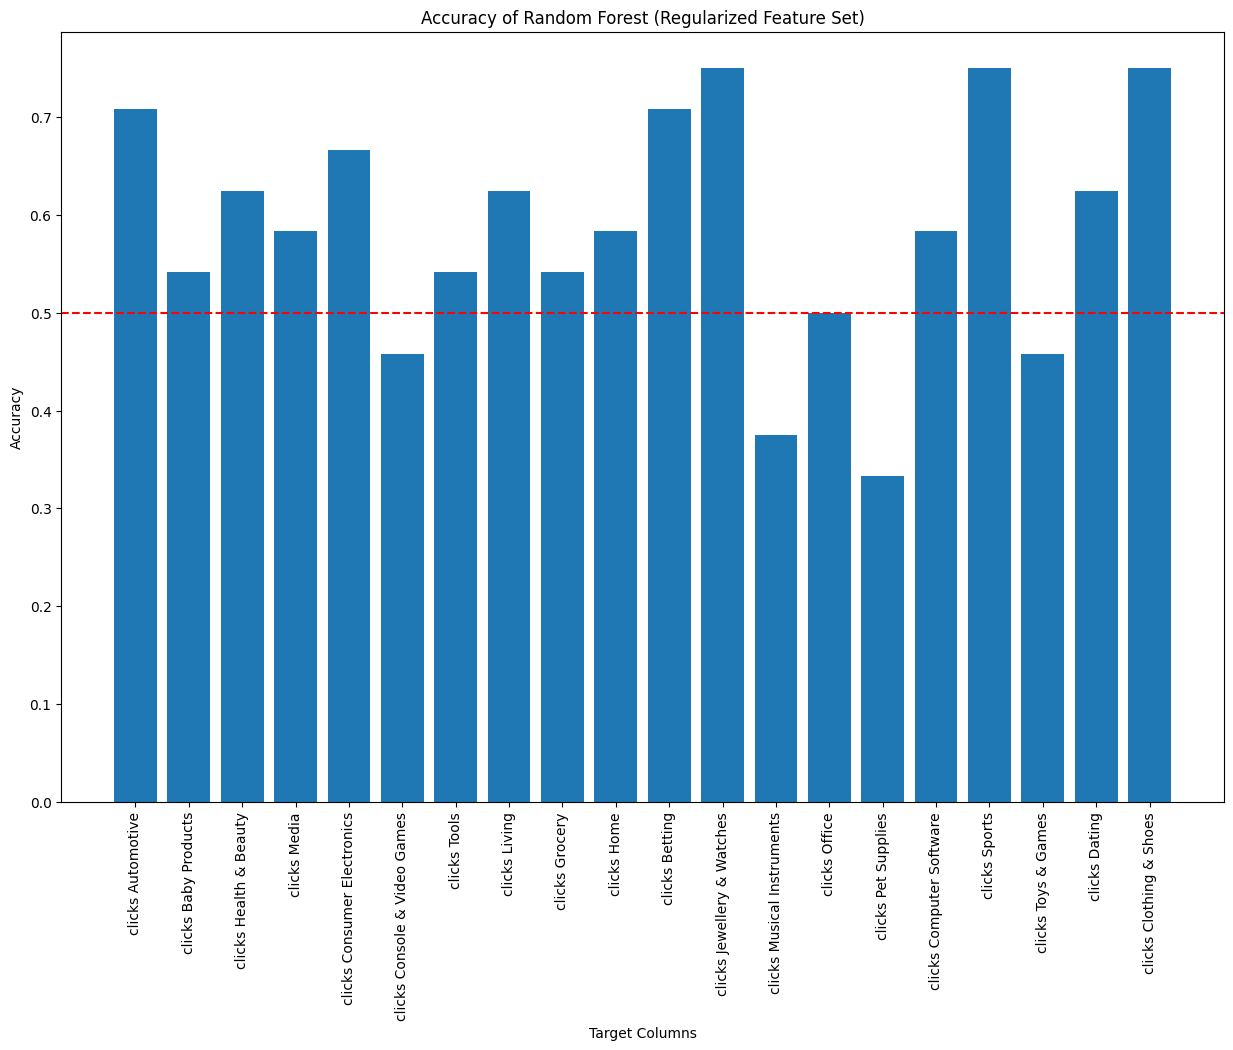

In [100]:
# Create a dictionary to store the classification report for each target column
classification_reports = {}

# Train and predict for each target column
for target_column_name, importance_info in feature_importance.items():
    features = importance_info['features']
    X_train_subset = X_train[features]
    X_test_subset = X_test[features]
    
    # Extract the single target column for the current category
    y_train_subset = y_train[target_column_name]
    
    # Train the SVM model
    rf_clf.fit(X_train_subset, y_train_subset)
    
    # Predict on the test set
    y_pred_subset = rf_clf.predict(X_test_subset)
    
    # Store the classification report
    classification_reports[target_column_name] = classification_report(
        y_test[target_column_name], y_pred_subset, output_dict=True, zero_division=1
    )
# Create a dictionary to store the classification report for each target column
classification_reports = {}

# Calculate the classification report for each target column
for i in range(y_test.shape[1]):
    target_column_name = column_names[i]
    classification_reports[target_column_name] = classification_report(y_test.iloc[:, i], y_pred[:, i], output_dict=True, zero_division=1)

# Convert the classification reports to tables and print them
for target_column_name, report in classification_reports.items():
    print(f"Target column '{target_column_name}':")
    report_table = pd.DataFrame(report).transpose()
    print(tabulate(report_table, headers='keys', tablefmt='psql'))
    print('\n')

# Store the accuracy scores for each target column
Reg_RF_accuracies = []

# Extract the accuracy score for each target column
for target_column_name, report in classification_reports.items():
    accuracy = report['accuracy']
    Reg_RF_accuracies.append(accuracy)

# Plot the accuracies
plt.figure(figsize=(15, 10))
plt.axhline(y=0.5, color='r', linestyle='--')
plt.bar(column_names, Reg_RF_accuracies)
plt.xlabel('Target Columns')
plt.ylabel('Accuracy')
plt.title('Accuracy of Random Forest (Regularized Feature Set)')
plt.xticks(rotation=90)
plt.show()


## LightGBM

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-pac

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000061 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-pac

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And i

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-pac

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015112 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000078 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000053 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Target column 'clicks Automotive':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    1        | 0        |   0        |  4        |
| 1            |    0.833333 | 1        |   0.909091 | 20        |
| accuracy     |    0.833333 | 0.833333 |   0.833333 |  0.833333 |
| macro avg    |    0.916667 | 0.5      |   0.454545 | 24        |
| weighted avg |    0.861111 | 0.833333 |   0.757576 | 24        |
+--------------+-------------+----------+------------+-----------+


Target column 'clicks Baby Products':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    0.458333 | 1        |   0.628571 | 11        |
| 1            |    1        | 0        |   0        |

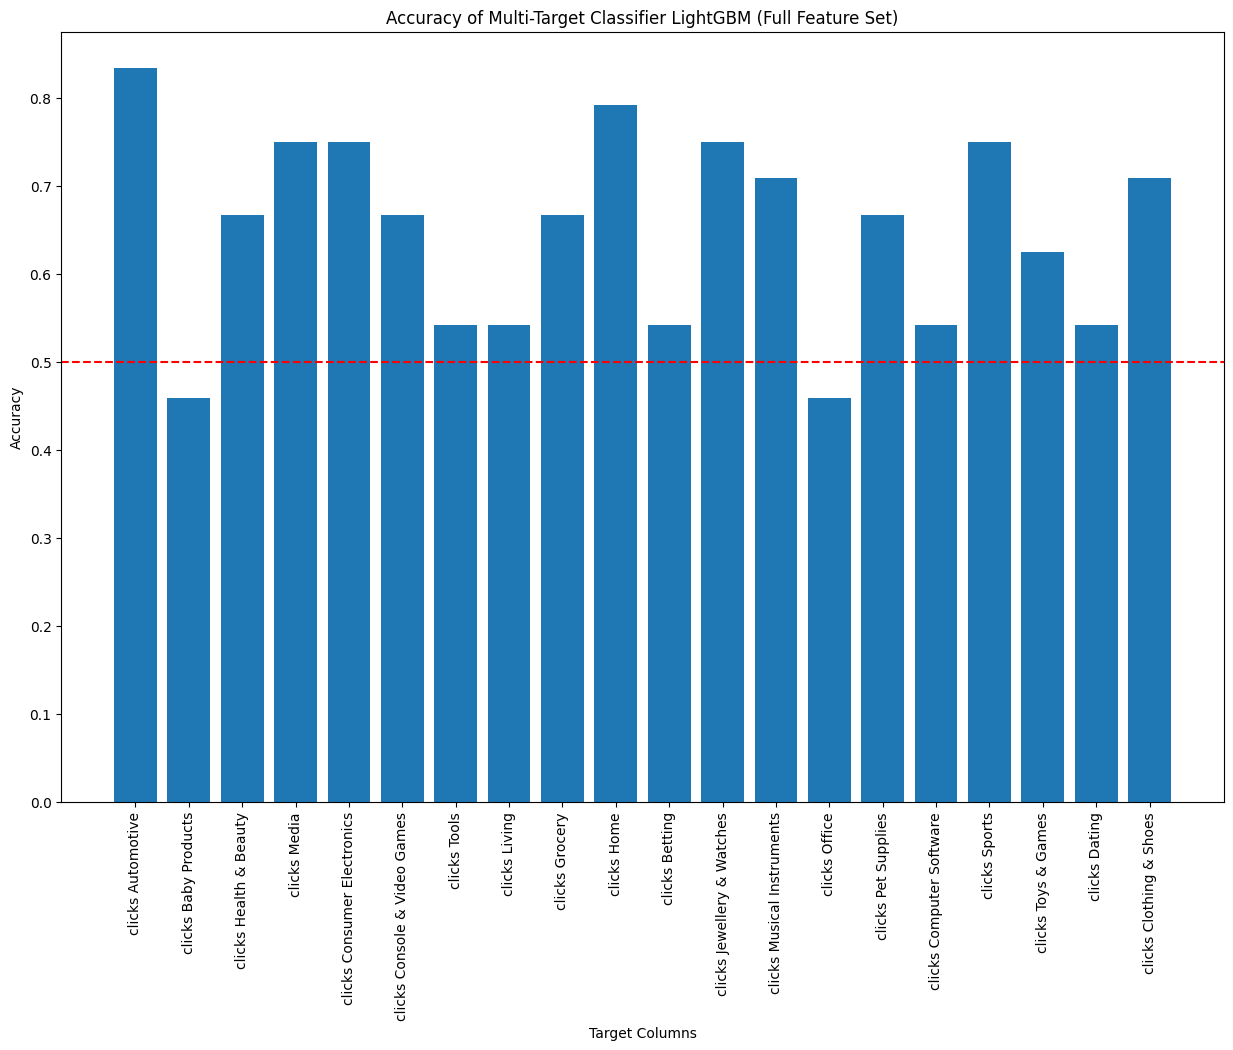

In [101]:
multi_target_classifier = MultiOutputClassifier(LightGBM_Clf)
multi_target_classifier.fit(X_train, y_train)

y_pred = multi_target_classifier.predict(X_test)

column_names = y.columns

# Create a dictionary to store the classification report for each target column
classification_reports = {}

# Calculate the classification report for each target column
for i in range(y_test.shape[1]):
    target_column_name = column_names[i]
    classification_reports[target_column_name] = classification_report(y_test.iloc[:, i], y_pred[:, i], output_dict=True, zero_division=1)

# Convert the classification reports to tables and print them
for target_column_name, report in classification_reports.items():
    print(f"Target column '{target_column_name}':")
    report_table = pd.DataFrame(report).transpose()
    print(tabulate(report_table, headers='keys', tablefmt='psql'))
    print('\n')

# Store the accuracy scores for each target column
Full_LGBM_accuracies = []

# Extract the accuracy score for each target column
for target_column_name, report in classification_reports.items():
    accuracy = report['accuracy']
    Full_LGBM_accuracies.append(accuracy)

# Plot the accuracies
plt.figure(figsize=(15, 10))
plt.axhline(y=0.5, color='r', linestyle='--')
plt.bar(column_names, Full_LGBM_accuracies)
plt.xlabel('Target Columns')
plt.ylabel('Accuracy')
plt.title('Accuracy of Multi-Target Classifier LightGBM (Full Feature Set)')
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-pac

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000067 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-pac

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000045 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-pac


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000056 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[Lig

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-pac

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000051 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

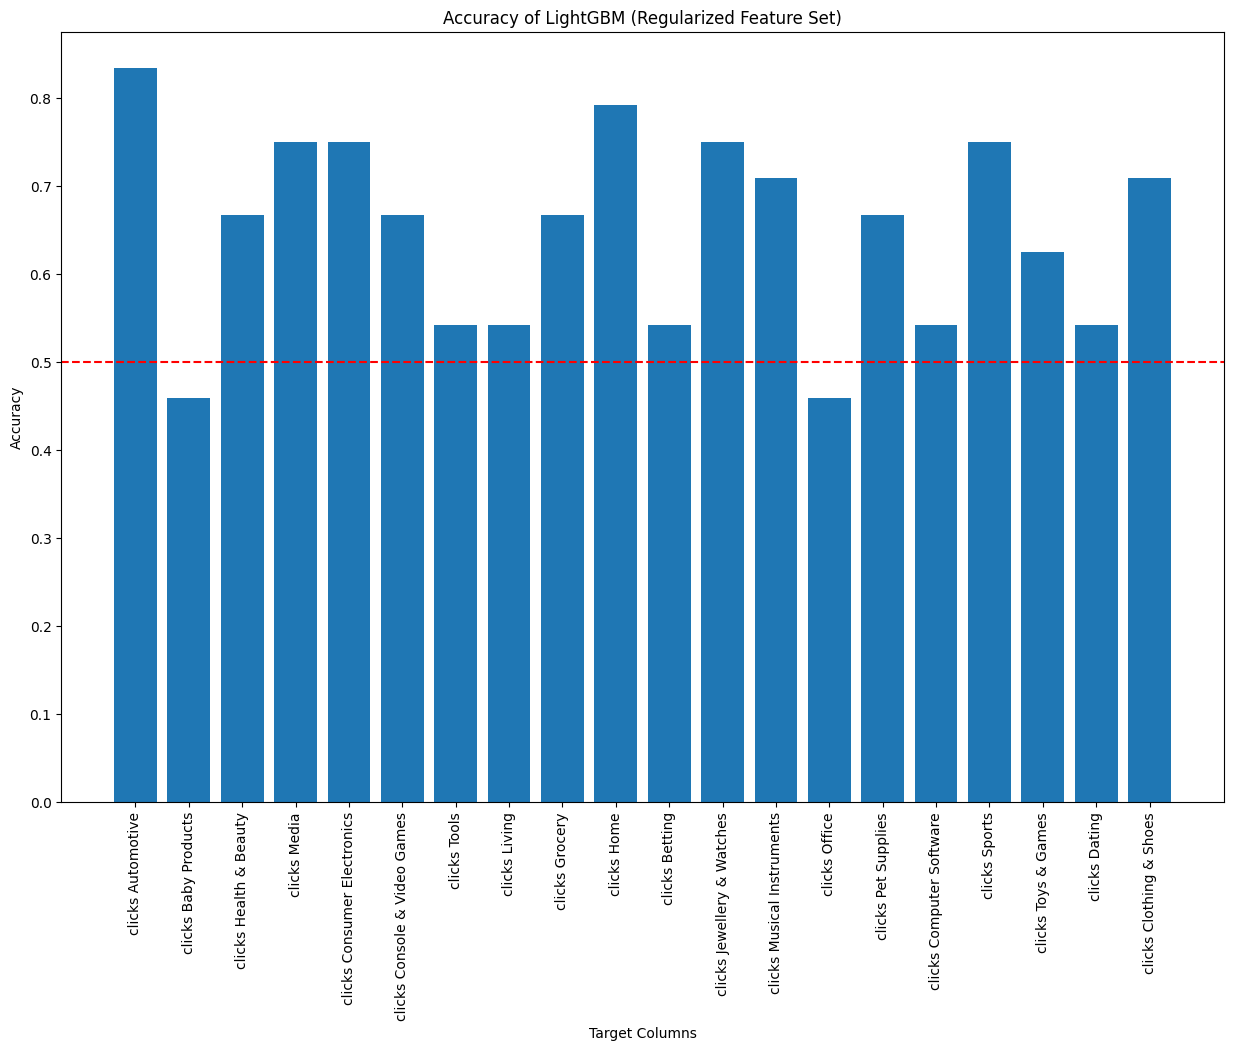

In [102]:
# Create a dictionary to store the classification report for each target column
classification_reports = {}

# Train and predict for each target column
for target_column_name, importance_info in feature_importance.items():
    features = importance_info['features']
    X_train_subset = X_train[features]
    X_test_subset = X_test[features]
    
    # Extract the single target column for the current category
    y_train_subset = y_train[target_column_name]
    
    # Train the SVM model
    LightGBM_Clf.fit(X_train_subset, y_train_subset)
    
    # Predict on the test set
    y_pred_subset = LightGBM_Clf.predict(X_test_subset)
    
    # Store the classification report
    classification_reports[target_column_name] = classification_report(
        y_test[target_column_name], y_pred_subset, output_dict=True, zero_division=1
    )
# Create a dictionary to store the classification report for each target column
classification_reports = {}

# Calculate the classification report for each target column
for i in range(y_test.shape[1]):
    target_column_name = column_names[i]
    classification_reports[target_column_name] = classification_report(y_test.iloc[:, i], y_pred[:, i], output_dict=True, zero_division=1)

# Convert the classification reports to tables and print them
for target_column_name, report in classification_reports.items():
    print(f"Target column '{target_column_name}':")
    report_table = pd.DataFrame(report).transpose()
    print(tabulate(report_table, headers='keys', tablefmt='psql'))
    print('\n')

# Store the accuracy scores for each target column
Reg_LGBM_accuracies = []

# Extract the accuracy score for each target column
for target_column_name, report in classification_reports.items():
    accuracy = report['accuracy']
    Reg_LGBM_accuracies.append(accuracy)

# Plot the accuracies
plt.figure(figsize=(15, 10))
plt.axhline(y=0.5, color='r', linestyle='--')
plt.bar(column_names, Reg_LGBM_accuracies)
plt.xlabel('Target Columns')
plt.ylabel('Accuracy')
plt.title('Accuracy of LightGBM (Regularized Feature Set)')
plt.xticks(rotation=90)
plt.show()


## XGBoost

Target column 'clicks Automotive':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    1        | 0        |   0        |  4        |
| 1            |    0.833333 | 1        |   0.909091 | 20        |
| accuracy     |    0.833333 | 0.833333 |   0.833333 |  0.833333 |
| macro avg    |    0.916667 | 0.5      |   0.454545 | 24        |
| weighted avg |    0.861111 | 0.833333 |   0.757576 | 24        |
+--------------+-------------+----------+------------+-----------+


Target column 'clicks Baby Products':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    0.458333 | 1        |   0.628571 | 11        |
| 1            |    1        | 0        |   0        |

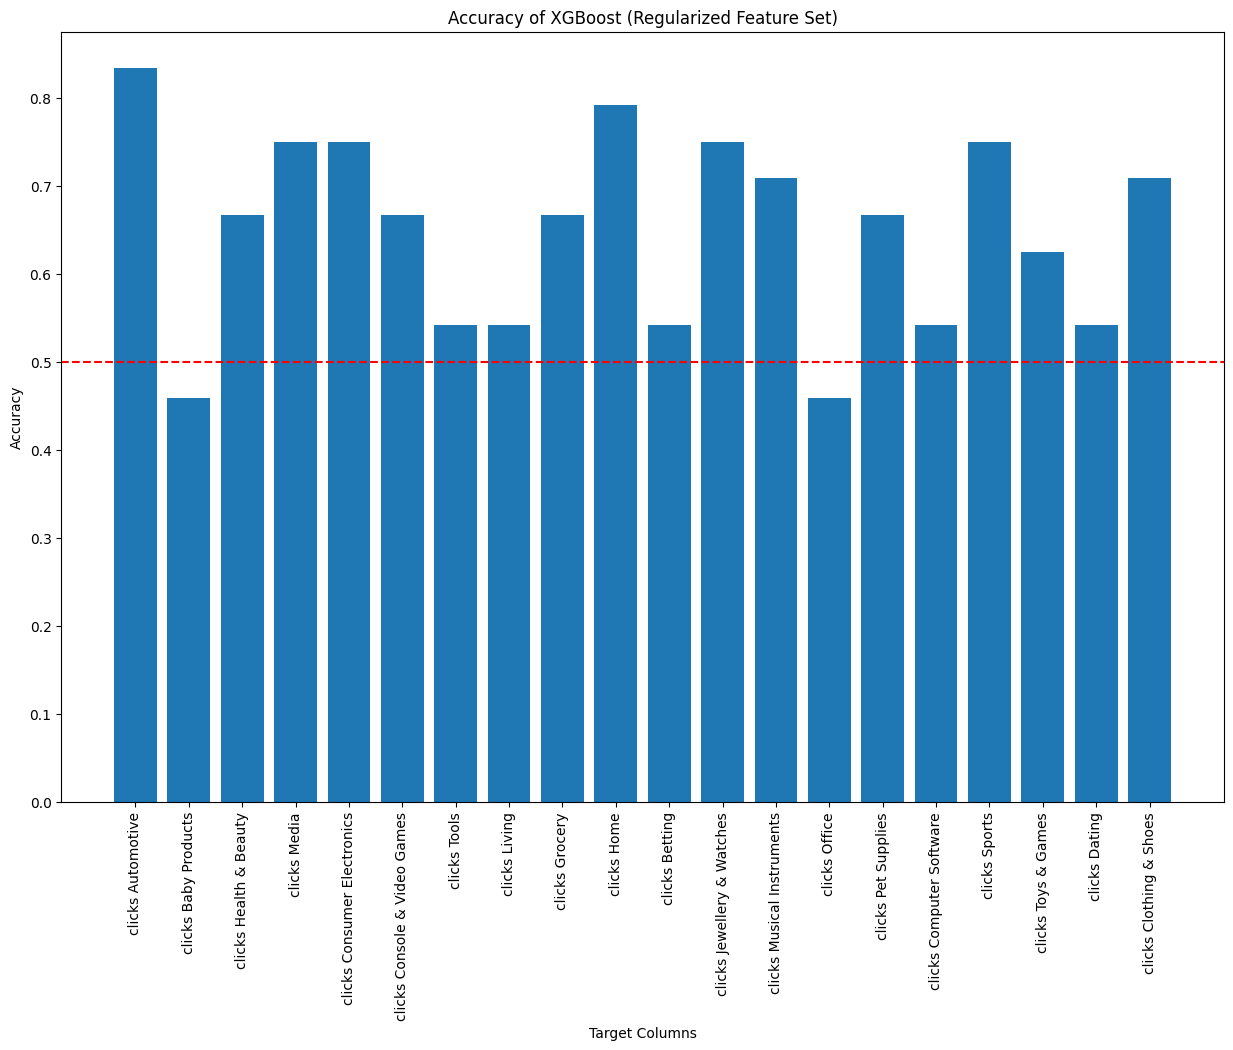

In [103]:
# Create a dictionary to store the classification report for each target column
classification_reports = {}

# Train and predict for each target column
for target_column_name, importance_info in feature_importance.items():
    features = importance_info['features']
    X_train_subset = X_train[features]
    X_test_subset = X_test[features]
    
    # Extract the single target column for the current category
    y_train_subset = y_train[target_column_name]
    
    # Train the SVM model
    xgboost_clf.fit(X_train_subset, y_train_subset)
    
    # Predict on the test set
    y_pred_subset = xgboost_clf.predict(X_test_subset)
    
    # Store the classification report
    classification_reports[target_column_name] = classification_report(
        y_test[target_column_name], y_pred_subset, output_dict=True, zero_division=1
    )
# Create a dictionary to store the classification report for each target column
classification_reports = {}

# Calculate the classification report for each target column
for i in range(y_test.shape[1]):
    target_column_name = column_names[i]
    classification_reports[target_column_name] = classification_report(y_test.iloc[:, i], y_pred[:, i], output_dict=True, zero_division=1)

# Convert the classification reports to tables and print them
for target_column_name, report in classification_reports.items():
    print(f"Target column '{target_column_name}':")
    report_table = pd.DataFrame(report).transpose()
    print(tabulate(report_table, headers='keys', tablefmt='psql'))
    print('\n')

# Store the accuracy scores for each target column
Reg_XGB_accuracies = []

# Extract the accuracy score for each target column
for target_column_name, report in classification_reports.items():
    accuracy = report['accuracy']
    Reg_XGB_accuracies.append(accuracy)

# Plot the accuracies
plt.figure(figsize=(15, 10))
plt.axhline(y=0.5, color='r', linestyle='--')
plt.bar(column_names, Reg_XGB_accuracies)
plt.xlabel('Target Columns')
plt.ylabel('Accuracy')
plt.title('Accuracy of XGBoost (Regularized Feature Set)')
plt.xticks(rotation=90)
plt.show()


Target column 'clicks Automotive':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    0.333333 |     0.5  |   0.4      |      4    |
| 1            |    0.888889 |     0.8  |   0.842105 |     20    |
| accuracy     |    0.75     |     0.75 |   0.75     |      0.75 |
| macro avg    |    0.611111 |     0.65 |   0.621053 |     24    |
| weighted avg |    0.796296 |     0.75 |   0.768421 |     24    |
+--------------+-------------+----------+------------+-----------+


Target column 'clicks Baby Products':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    0.421053 | 0.727273 |   0.533333 | 11        |
| 1            |    0.4      | 0.153846 |   0.222222 |

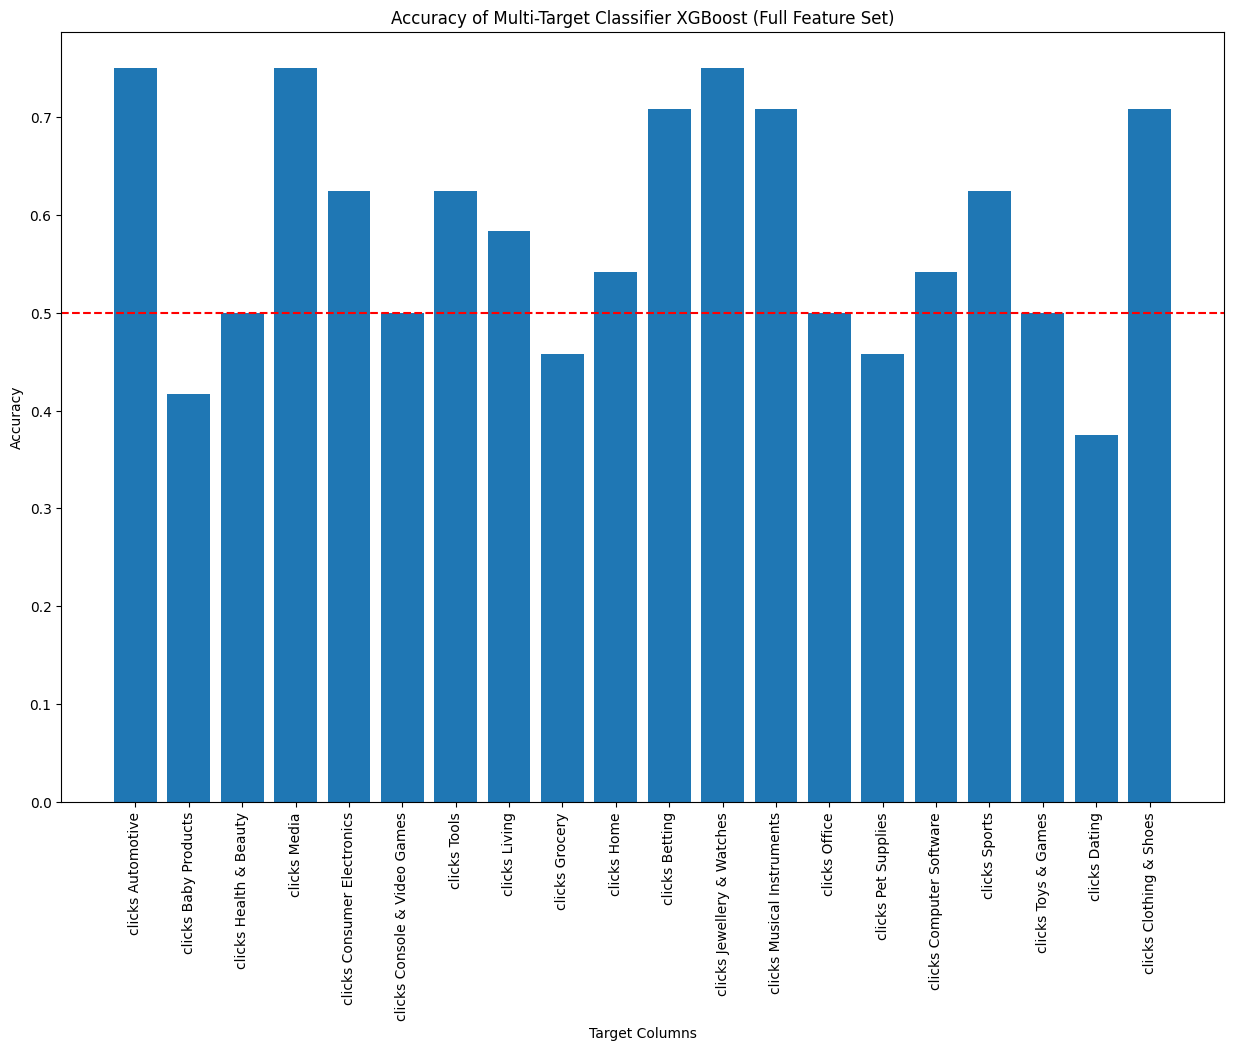

In [104]:
multi_target_classifier = MultiOutputClassifier(xgboost_clf)
multi_target_classifier.fit(X_train, y_train)

y_pred = multi_target_classifier.predict(X_test)

column_names = y.columns

# Create a dictionary to store the classification report for each target column
classification_reports = {}

# Calculate the classification report for each target column
for i in range(y_test.shape[1]):
    target_column_name = column_names[i]
    classification_reports[target_column_name] = classification_report(y_test.iloc[:, i], y_pred[:, i], output_dict=True, zero_division=1)

# Convert the classification reports to tables and print them
for target_column_name, report in classification_reports.items():
    print(f"Target column '{target_column_name}':")
    report_table = pd.DataFrame(report).transpose()
    print(tabulate(report_table, headers='keys', tablefmt='psql'))
    print('\n')
    

# Store the accuracy scores for each target column
Full_XGB_accuracies = []

# Extract the accuracy score for each target column
for target_column_name, report in classification_reports.items():
    accuracy = report['accuracy']
    Full_XGB_accuracies.append(accuracy)

# Plot the accuracies
plt.figure(figsize=(15, 10))
plt.axhline(y=0.5, color='r', linestyle='--')
plt.bar(column_names, Full_XGB_accuracies)
plt.xlabel('Target Columns')
plt.ylabel('Accuracy')
plt.title('Accuracy of Multi-Target Classifier XGBoost (Full Feature Set)')
plt.xticks(rotation=90)
plt.show()

# Plot Accuracies Together

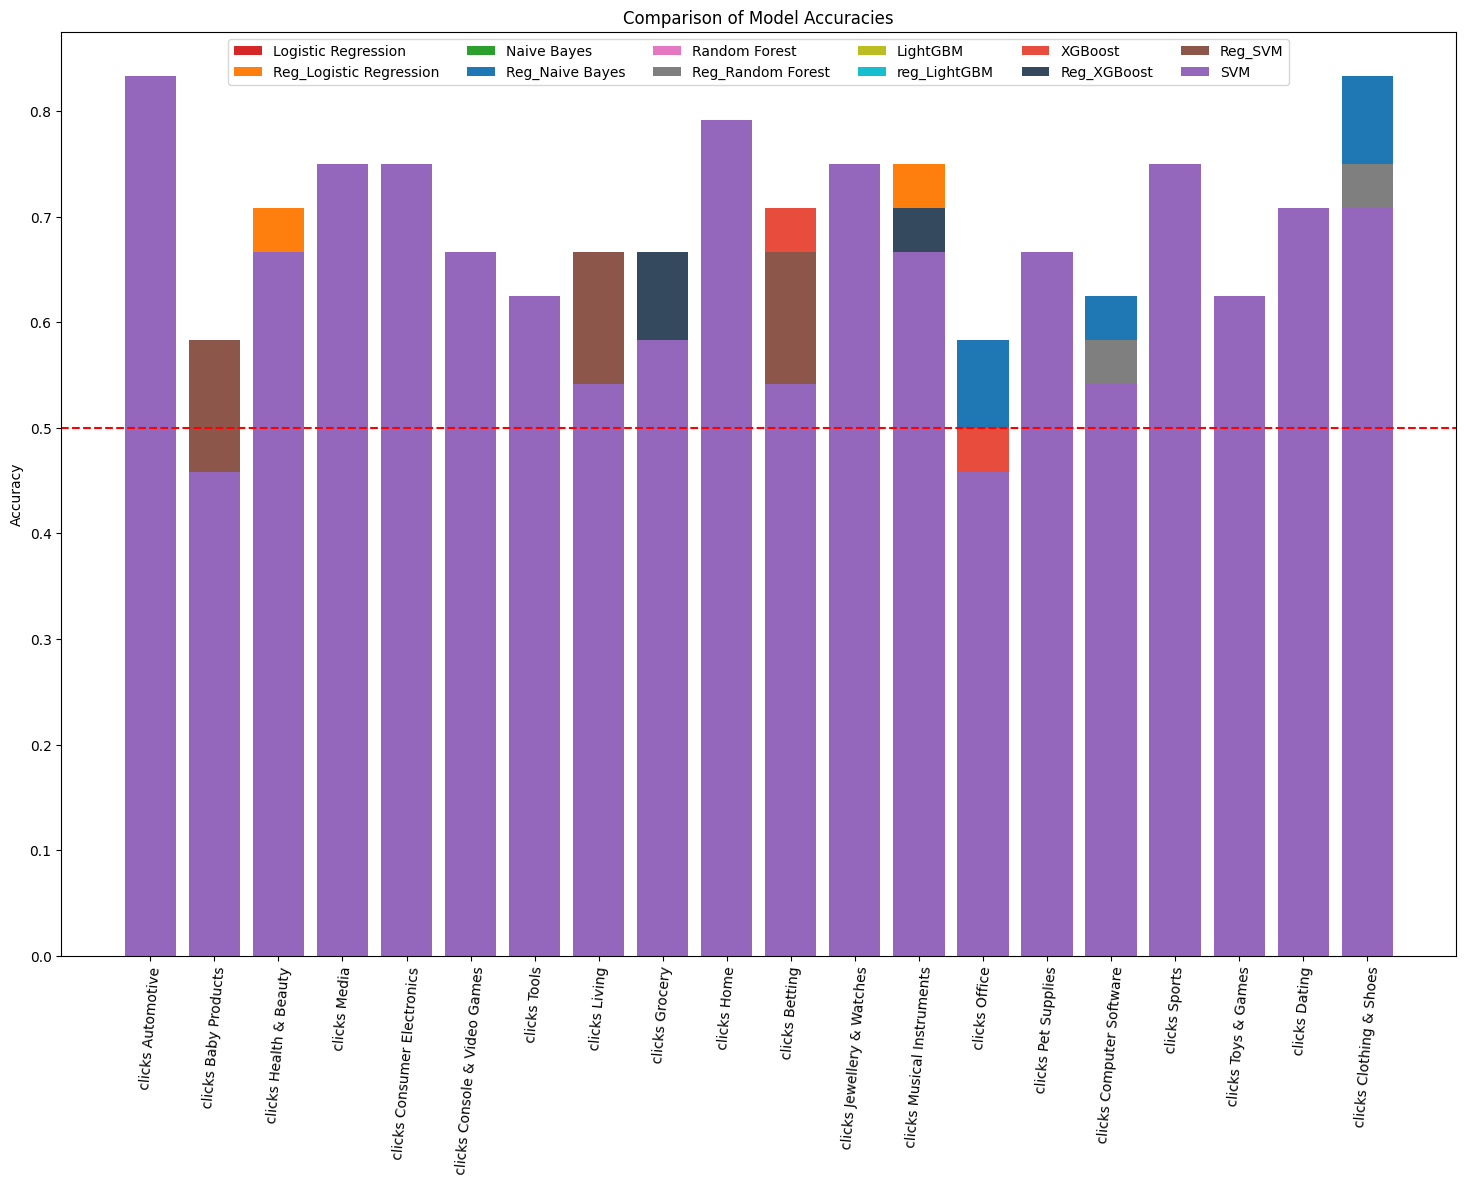

In [105]:
column_names = y.columns

# Plotting the accuracies
plt.figure(figsize=(18, 12))
plt.axhline(y=0.5, color='r', linestyle='--')

plt.bar(range(len(Full_LGR_accuracies)), Full_LGR_accuracies, label='Logistic Regression', color='#d62728')
plt.bar(range(len(Reg_LGR_accuracies)), Reg_LGR_accuracies, label='Reg_Logistic Regression', color='#ff7f0e')
plt.bar(range(len(Full_NB_accuracies)), Full_NB_accuracies, label='Naive Bayes', color='#2ca02c')
plt.bar(range(len(Reg_NB_accuracies)), Reg_NB_accuracies, label='Reg_Naive Bayes', color='#1f77b4')
plt.bar(range(len(Full_RF_accuracies)), Full_RF_accuracies, label='Random Forest', color='#e377c2')
plt.bar(range(len(Reg_RF_accuracies)), Reg_RF_accuracies, label='Reg_Random Forest',color='#7f7f7f')
plt.bar(range(len(Full_LGBM_accuracies)), Full_LGBM_accuracies, label='LightGBM',color='#bcbd22')
plt.bar(range(len(Reg_LGBM_accuracies)), Reg_LGBM_accuracies, label='reg_LightGBM', color='#17becf')
plt.bar(range(len(Full_XGB_accuracies)), Full_XGB_accuracies, label='XGBoost',color='#e74c3c')
plt.bar(range(len(Reg_XGB_accuracies)), Reg_XGB_accuracies, label='Reg_XGBoost',color='#34495e')
plt.bar(range(len(Reg_SVM_accuracies)), Reg_SVM_accuracies, label='Reg_SVM',color='#8c564b')
plt.bar(range(len(Full_SVM_accuracies)), Full_SVM_accuracies, label='SVM', color='#9467bd')


plt.xticks(range(len(column_names)), column_names)  # Set the x-axis tick labels
plt.xticks(rotation=85)

# plt.xlabel('Entry')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
# plt.legend()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=6)  

plt.show()


In [106]:
accuracies = [Full_LGR_accuracies, Reg_LGR_accuracies, Full_NB_accuracies, Reg_NB_accuracies, Full_SVM_accuracies, Reg_SVM_accuracies,
              Full_RF_accuracies, Reg_RF_accuracies, Full_LGBM_accuracies, Reg_LGBM_accuracies, Full_XGB_accuracies, Reg_XGB_accuracies]

In [107]:
import matplotlib.pyplot as plt

result_dict = {}

for i, column_name in enumerate(column_names):
    # Initialize an empty list for storing accuracies for the current column_name
    accuracies_for_column = []
    
    # Iterate through each accuracy list and extract the accuracy value for the current column_name
    for accuracy_list in accuracies:
        accuracy = accuracy_list[i]
        accuracies_for_column.append(accuracy)
    
    # Store the accuracies for the current column_name in the result_dict
    result_dict[column_name] = accuracies_for_column


In [108]:
# result_dict

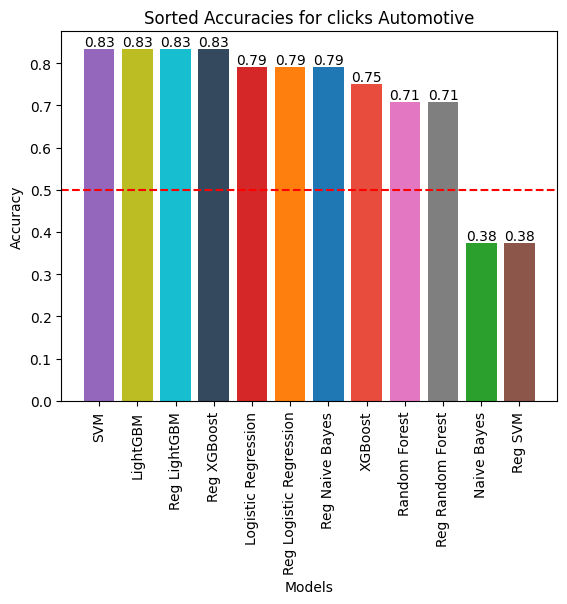

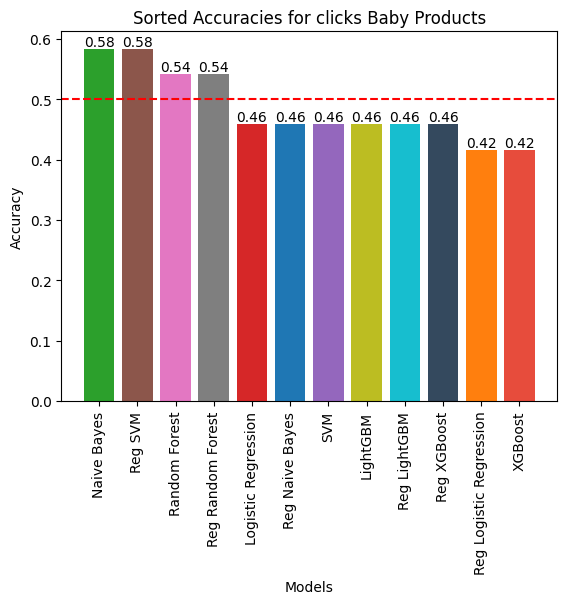

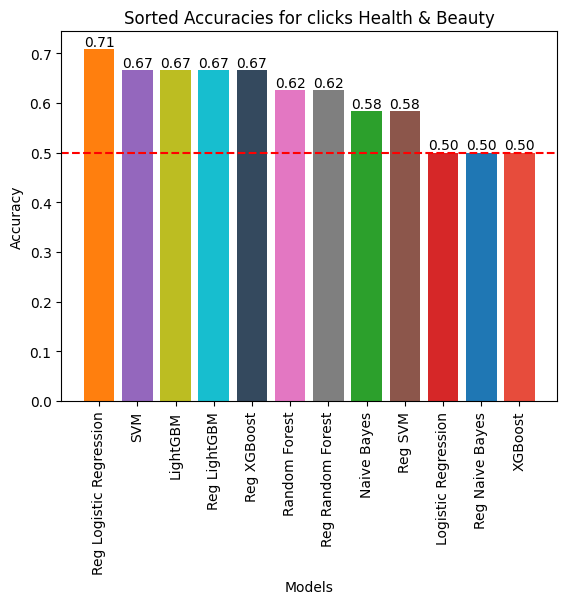

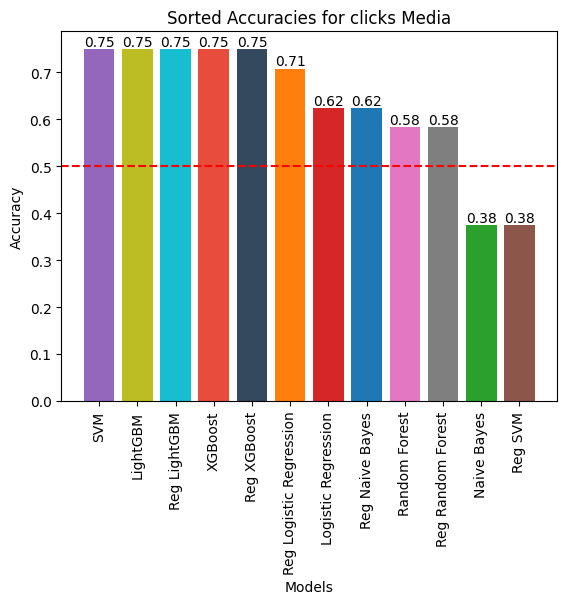

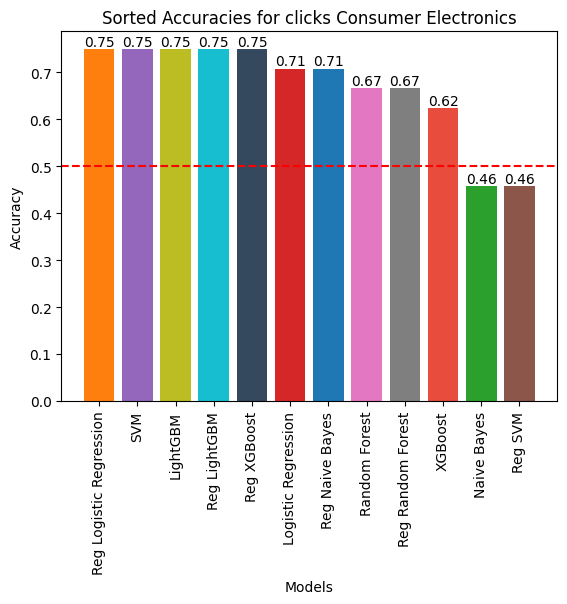

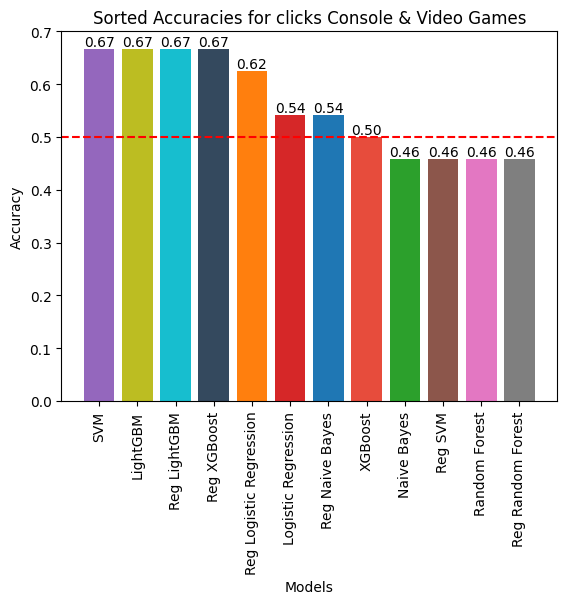

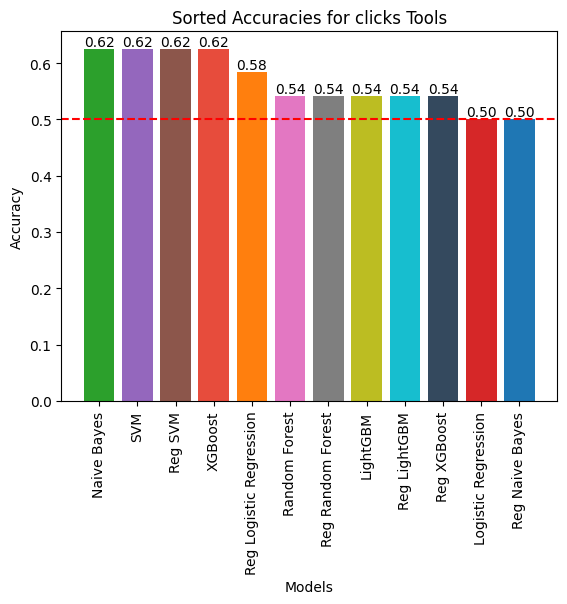

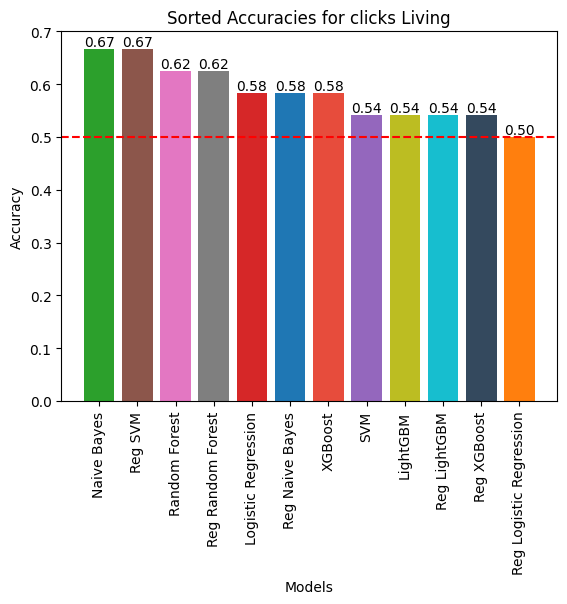

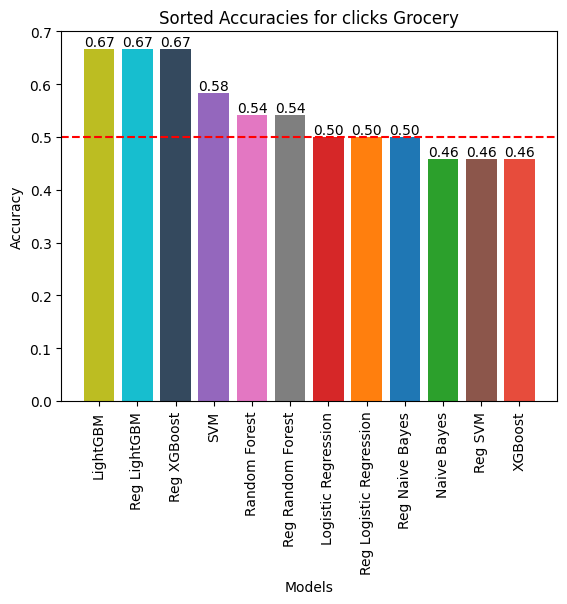

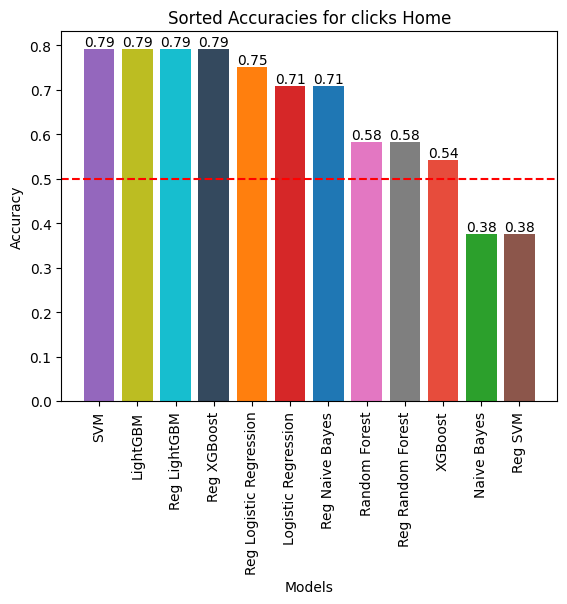

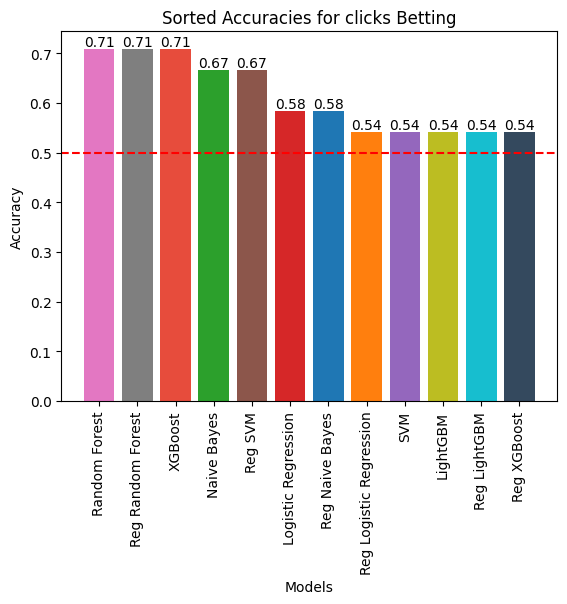

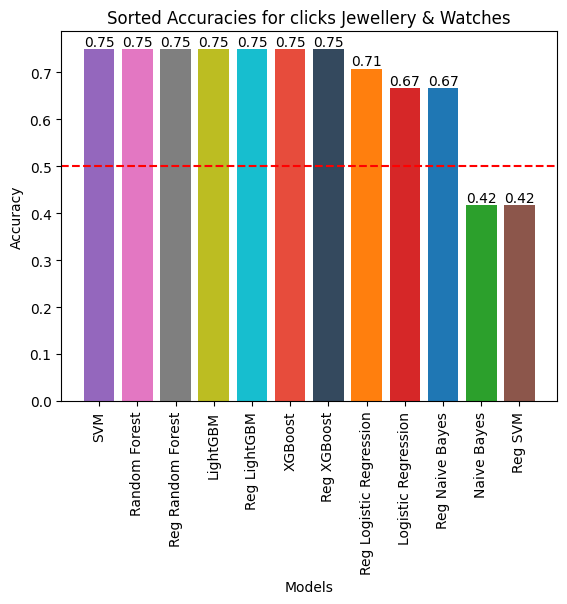

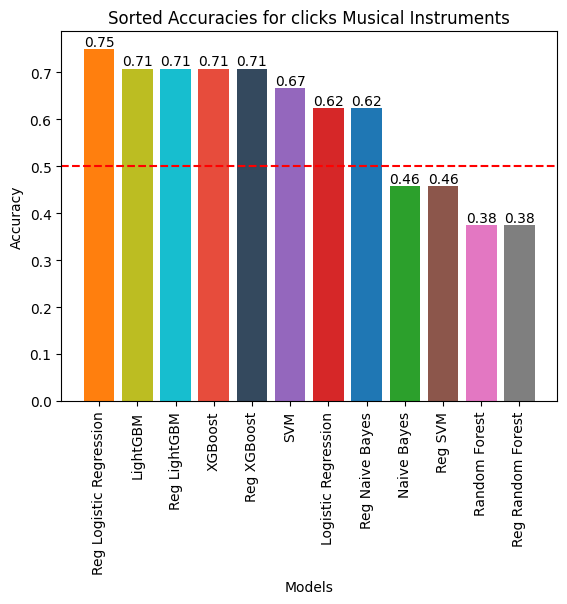

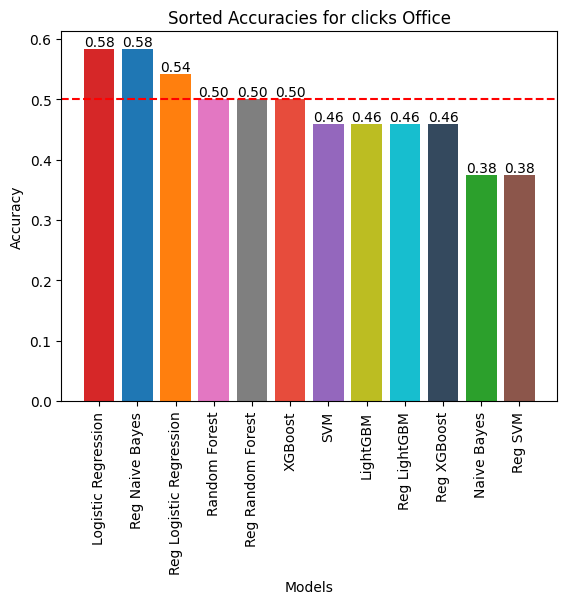

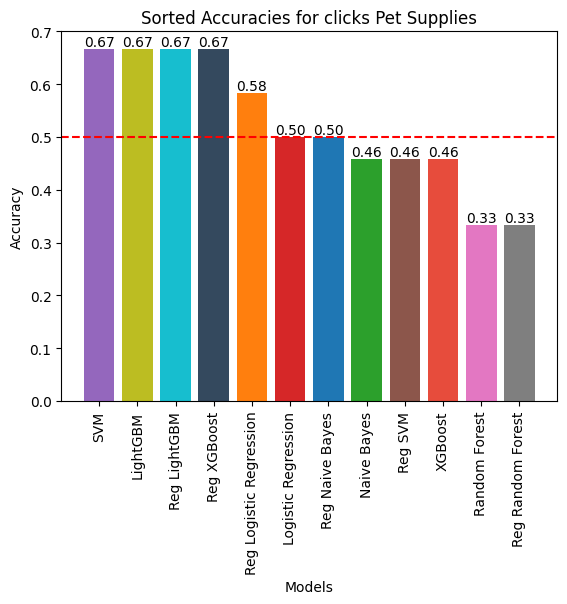

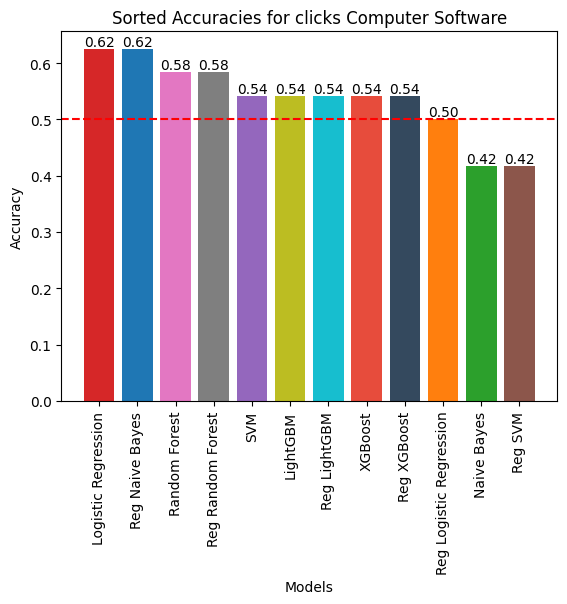

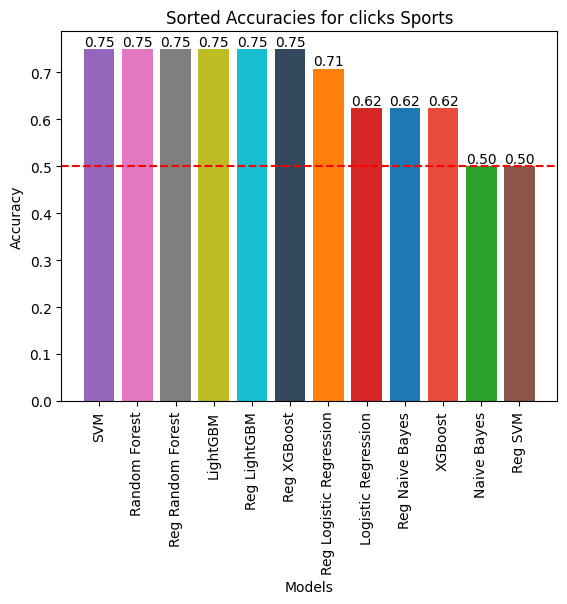

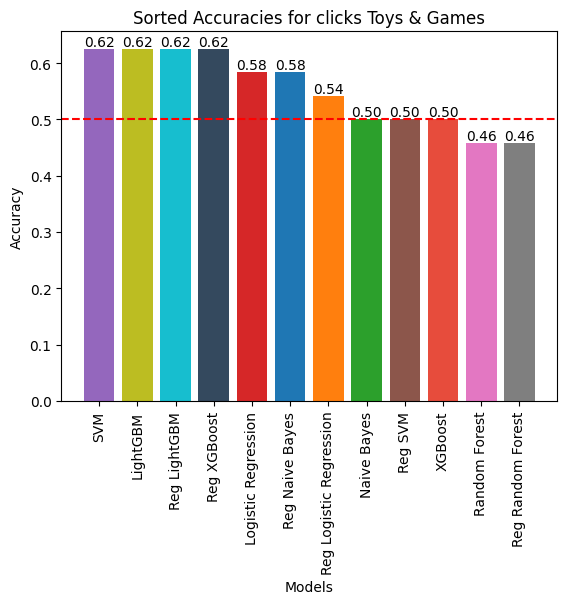

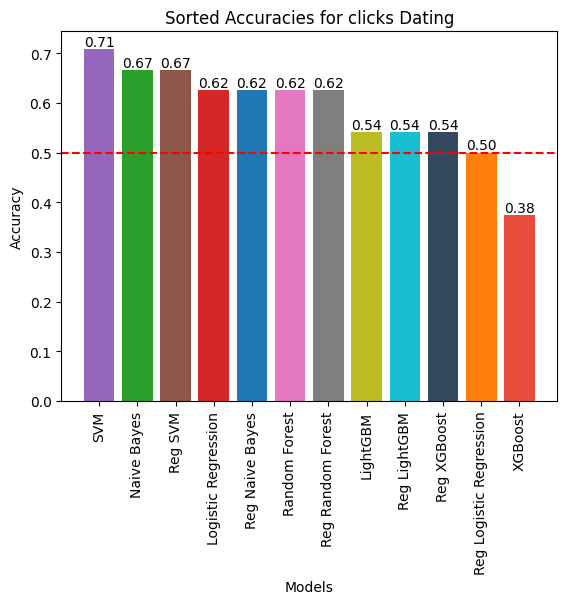

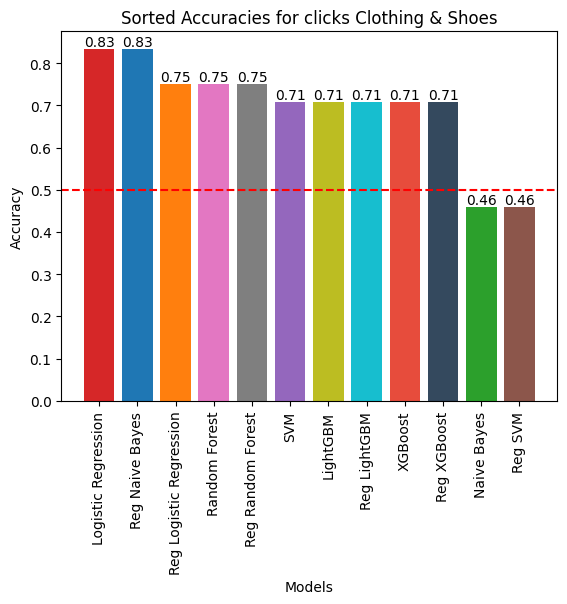

In [109]:
import matplotlib.pyplot as plt

model_labels = ['Logistic Regression', 'Reg Logistic Regression', 'Naive Bayes', 'Reg Naive Bayes', 'SVM', 'Reg SVM',
                'Random Forest', 'Reg Random Forest', 'LightGBM', 'Reg LightGBM', 'XGBoost', 'Reg XGBoost']

# Define a color mapping dictionary
color_mapping = {
    'Logistic Regression': '#d62728',
    'Reg Logistic Regression': '#ff7f0e',
    'Naive Bayes': '#2ca02c',
    'Reg Naive Bayes': '#1f77b4',
    'SVM': '#9467bd',
    'Reg SVM': '#8c564b',
    'Random Forest': '#e377c2',
    'Reg Random Forest': '#7f7f7f',
    'LightGBM': '#bcbd22',
    'Reg LightGBM': '#17becf',
    'XGBoost': '#e74c3c',
    'Reg XGBoost': '#34495e'
}

for column_name, accuracies in result_dict.items():
    # Combine the model labels and accuracies into a list of tuples
    data = list(zip(model_labels, accuracies))
    
    # Sort the data based on accuracies in descending order
    sorted_data = sorted(data, key=lambda x: x[1], reverse=True)
    
    # Extract the sorted model labels and sorted accuracies
    sorted_model_labels, sorted_accuracies = zip(*sorted_data)
    
    # Create a new plot for the current column_name
    plt.figure()
    
    # Set the x-coordinates for the bars
    x = range(len(sorted_accuracies))
    
    # Plot the sorted accuracies as bars, using the color mapping for each model name
    for i, acc in enumerate(sorted_accuracies):
        model_name = sorted_model_labels[i]
        color = color_mapping.get(model_name, 'tab:blue')
        plt.bar(i, acc, color=color)
        plt.text(i, acc, f'{acc:.2f}', ha='center', va='bottom')
    
    # Set the tick labels as the sorted model labels and rotate them for better readability
    plt.xticks(x, sorted_model_labels, rotation=90)
    plt.axhline(y=0.5, color='r', linestyle='--')
    # Set labels and title for the plot
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title(f'Sorted Accuracies for {column_name}')
    
    # Display the plot
    plt.show()


# According to the results, after regularization, there is at least one model that we can choose for a specific category which results in an accuracy of more than 50 percent. We assume an accuracy of 50% and less is where our model fails to do any good